### Prompt: 

Netflix wants to identify similar movies based on movie characteristics.

Go out and find a dataset of interest. It could be one that helps you work on one of our recommended research questions, or any other dataset that addresses an unsupervised learning question of your own.

Explore the data. Get to know the data. Spend a lot of time going over its quirks and peccadilloes. You should understand how it was gathered, what's in it, and what the variables look like.

You should try several different approaches and really work to tune a variety of models before choosing what you consider to be the best performer.

### Things to keep in mind: how do clustering and modeling compare? What are the advantages of each? Why would you want to use one over the other?

### This will ultimately include the following deliverables:

A Jupyter notebook that tells a compelling story about your data (to be submitted at the end of this checkpoint). <br>
A 15 to 30 minute presentation of your findings. You'll need to produce a deck and present it to the Thinkful community.

### Let's start by importing our data, doing some data exploration and cleaning if it's required and getting it ready for some clustering! 

In [1]:
import numpy as np
import pandas as pd
import scipy
import itertools
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

from ast import literal_eval
import os
import pandas as pd

In [2]:


df_movies = pd.read_csv('/Users/ir3n3br4t515/Desktop/movies_metadata.csv')
df_ratings = pd.read_csv('/Users/ir3n3br4t515/Desktop/ratings.csv')
df_links = pd.read_csv('/Users/ir3n3br4t515/Desktop/links.csv')


/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_movies.head(10)


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   
5  False                                                NaN  60000000   
6  False                                                NaN  58000000   
7  False                                                NaN         0   
8  False                                                NaN  35000000   
9  False  {'id': 645, 'name': 'James Bond Collection', '...  58000000   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   
5  [{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...   
6  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
7  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
8  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
9  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   

                                       homepage     id    imdb_id  \
0          http://toystory.disney.com/toy-story    862  tt0114709   
1                                           NaN   8844  tt0113497   
2                                           NaN  15602  tt0113228   
3                                           NaN  31357  tt0114885   
4                                           NaN  11862  tt0113041   
5                                           NaN    949  tt0113277   
6                                           NaN  11860  tt0114319   
7                                           NaN  45325  tt0112302   
8                                           NaN   9091  tt0114576   
9  http://www.mgm.com/view/movie/757/Goldeneye/    710  tt0113189   

  original_language               original_title  \
0                en                    Toy Story   
1                en                      Jumanji   
2                en             Grumpier Old Men   
3                en            Waiting to Exhale   
4                en  Father of the Bride Part II   
5                en                         Heat   
6                en                      Sabrina   
7                en                 Tom and Huck   
8                en                 Sudden Death   
9                en                    GoldenEye   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   
5  Obsessive master thief, Neil McCauley leads a ...  ...   1995-12-15   
6  An ugly duckling having undergone a remarkable...  ...   1995-12-15   
7  A mischievous young boy, Tom Sawyer, witnesses...  ...   1995-12-22   
8  International action superstar Jean Claude Van...  ...   1995-12-22   
9  James Bond must unmask the mysterious head of ...  ...   1995-11-16   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': '

### The dataset has the following features:

budget - The budget in which the movie was made.<br>
genre - The genre of the movie, Action, Comedy ,Thriller etc.<br>
homepage - A link to the homepage of the movie.<br>
id - This is infact the movie_id as in the first dataset.<br>
keywords - The keywords or tags related to the movie.<br>
original_language - The language in which the movie was made.<br>
original_title - The title of the movie before translation or adaptation.<br>
overview - A brief description of the movie.<br>
popularity - A numeric quantity specifying the movie popularity.<br>
production_companies - The production house of the movie.<br>
production_countries - The country in which it was produced.<br>
release_date - The date on which it was released.<br>
revenue - The worldwide revenue generated by the movie.<br>
runtime - The running time of the movie in minutes.<br>
status - "Released" or "Rumored".<br>
tagline - Movie's tagline.<br>
title - Title of the movie.<br>
vote_average - average ratings the movie recieved.<br>
vote_count - the count of votes recieved.<br>

### For clustering, we will be focusing on the int columns of:

Budget<br>
id (Movie Id)<br>
Release Date (year)<br>
Revenue<br>
Runtime<br>
vote_average<br>
vote_count<br>
Title - Though this is not a numerical value, we will be using the Title later to do some sample checking on our data to make sure the clusters intuitively make sense! 



### Cleaning 

Below we will get a sense of how our int categories look so that we can later use them for clustering. 


Our budget, id and release date columns need to be transfered to integers.<br> 


In [4]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45466 non-null object
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45466 non-null object
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45379 non-null object
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null objec

In [5]:
df_movies.revenue = pd.to_numeric(df_movies.revenue, errors= 'coerce')
df_movies.id = pd.to_numeric(df_movies.id, errors= 'coerce')
df_movies.budget = pd.to_numeric(df_movies.budget, errors= 'coerce')


In [6]:
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors = 'coerce').dt.year


In [7]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
adult                    45466 non-null object
belongs_to_collection    4494 non-null object
budget                   45463 non-null float64
genres                   45466 non-null object
homepage                 7782 non-null object
id                       45463 non-null float64
imdb_id                  45449 non-null object
original_language        45455 non-null object
original_title           45466 non-null object
overview                 44512 non-null object
popularity               45461 non-null object
poster_path              45080 non-null object
production_companies     45463 non-null object
production_countries     45463 non-null object
release_date             45376 non-null float64
revenue                  45460 non-null float64
runtime                  45203 non-null float64
spoken_languages         45460 non-null object
status                   45379 non-null ob

### Checking again to make sure we have integers in all categories modeled in the K means clustering algorithm. Everything looks good! And once again, we have our integer columns of:
<br><br>

Budget<br>
id (Movie Id)<br>
Release Date (year)<br>
Revenue<br>
Runtime<br>
vote_average<br>
vote_count<br>

### Ok. Now let's move onto Genres. 

In [8]:
list (df_movies.genres)

["[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 10749, 'name': 'Romance'}, {'id': 35, 'name': 'Comedy'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 35, 'name': 'Comedy'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}]",
 "[{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 12, 'name': 'Adventure'}, {'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]",
 "[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10

### Let's start by breaking up these long lists of genres into binary columns for each Genre


In [9]:
# run the following two lines only once
df_movies["genres"] = df_movies.genres.apply(lambda x: literal_eval(x))
df_movies["genres"] = df_movies.genres.apply(lambda x: [el["name"] for el in x])

In [10]:
unique_genres = set()
for col in df_movies.genres:
    for genr in col:
        unique_genres.add(genr)

print(unique_genres)

{'Thriller', 'Comedy', 'Carousel Productions', 'Family', 'Telescene Film Group Productions', 'Vision View Entertainment', 'War', 'Odyssey Media', 'Fantasy', 'Aniplex', 'Pulser Productions', 'Crime', 'TV Movie', 'Adventure', 'Mystery', 'Action', 'Rogue State', 'Romance', 'Drama', 'BROSTA TV', 'The Cartel', 'Sentai Filmworks', 'Mardock Scramble Production Committee', 'Science Fiction', 'Horror', 'Western', 'Documentary', 'Foreign', 'GoHands', 'Music', 'Animation', 'History'}


In [11]:
df_movies = df_movies.append(pd.DataFrame(columns = unique_genres))
df_movies[list(unique_genres)] = 0

for i, row in df_movies.iterrows():
    df_movies.loc[i, df_movies.iloc[i,:]["genres"]] = 1

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [12]:
df_movies.head()

Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
0       0          0          1        0          0                     0   
1       0          1          0        0          0                     0   
2       0          0          0        0          0                     0   
3       0          0          0        0          0                     0   
4       0          0          0        0          0                     0   

   Comedy  Crime  Documentary  Drama  ...  release_date      revenue  runtime  \
0       1      0            0      0  ...        1995.0  373554033.0     81.0   
1       0      0            0      0  ...        1995.0  262797249.0    104.0   
2       1      0            0      0  ...        1995.0          0.0    101.0   
3       1      0            0      1  ...        1995.0   81452156.0    127.0   
4       1      0            0      0  ...        1995.0   76578911.0    106.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count  
0                    Toy Story  False           7.7      5415.0  
1                      Jumanji  False           6.9      2413.0  
2             Grumpier Old Men  False           6.5        92.0  
3            Waiting to Exhale  False           6.1        34.0  
4  Father of the Bride Part II  False           5.7       173.0  

[5 rows x 56 columns]

### Our genres are binarized, which is great. Now the nulls. We're just going to remove them since they make up such a small percentage of our dataset (less than 1%)

In [13]:
df_movies.isnull().sum()


Action                                       0
Adventure                                    0
Animation                                    0
Aniplex                                      0
BROSTA TV                                    0
Carousel Productions                         0
Comedy                                       0
Crime                                        0
Documentary                                  0
Drama                                        0
Family                                       0
Fantasy                                      0
Foreign                                      0
GoHands                                      0
History                                      0
Horror                                       0
Mardock Scramble Production Committee        0
Music                                        0
Mystery                                      0
Odyssey Media                                0
Pulser Productions                           0
Rogue State  

In [14]:
df_movies_ = df_movies[['id', 'budget', 'vote_average', 'vote_count', 'revenue', 'runtime', 'release_date']].dropna()

In [15]:
df_movies_.isnull().sum()


id              0
budget          0
vote_average    0
vote_count      0
revenue         0
runtime         0
release_date    0
dtype: int64

### We don't have any missing values!

### We also want to make sure we reset our index because our id column had some nulls. 

In [16]:
df_movies.reset_index(drop = True, inplace = True)

In [17]:
df_movies.head()

Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
0       0          0          1        0          0                     0   
1       0          1          0        0          0                     0   
2       0          0          0        0          0                     0   
3       0          0          0        0          0                     0   
4       0          0          0        0          0                     0   

   Comedy  Crime  Documentary  Drama  ...  release_date      revenue  runtime  \
0       1      0            0      0  ...        1995.0  373554033.0     81.0   
1       0      0            0      0  ...        1995.0  262797249.0    104.0   
2       1      0            0      0  ...        1995.0          0.0    101.0   
3       1      0            0      1  ...        1995.0   81452156.0    127.0   
4       1      0            0      0  ...        1995.0   76578911.0    106.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count  
0                    Toy Story  False           7.7      5415.0  
1                      Jumanji  False           6.9      2413.0  
2             Grumpier Old Men  False           6.5        92.0  
3            Waiting to Exhale  False           6.1        34.0  
4  Father of the Bride Part II  False           5.7       173.0  

[5 rows x 56 columns]

### Let's now get a sense of our data by visualizing it and understanding where our unique values reside so that we know where the bulk of it is coming from.

In [18]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 56 columns):
Action                                   45466 non-null int64
Adventure                                45466 non-null int64
Animation                                45466 non-null int64
Aniplex                                  45466 non-null int64
BROSTA TV                                45466 non-null int64
Carousel Productions                     45466 non-null int64
Comedy                                   45466 non-null int64
Crime                                    45466 non-null int64
Documentary                              45466 non-null int64
Drama                                    45466 non-null int64
Family                                   45466 non-null int64
Fantasy                                  45466 non-null int64
Foreign                                  45466 non-null int64
GoHands                                  45466 non-null int64
History                

In [19]:
df_movies.dtypes

Action                                     int64
Adventure                                  int64
Animation                                  int64
Aniplex                                    int64
BROSTA TV                                  int64
Carousel Productions                       int64
Comedy                                     int64
Crime                                      int64
Documentary                                int64
Drama                                      int64
Family                                     int64
Fantasy                                    int64
Foreign                                    int64
GoHands                                    int64
History                                    int64
Horror                                     int64
Mardock Scramble Production Committee      int64
Music                                      int64
Mystery                                    int64
Odyssey Media                              int64
Pulser Productions  

In [20]:
num_movies = len(df_movies.id.unique())
print('There are {} unique movies in this data set'.format( num_movies))


There are 45434 unique movies in this data set


In [21]:
for col in df_movies.columns: 
    print(col) 

Action
Adventure
Animation
Aniplex
BROSTA TV
Carousel Productions
Comedy
Crime
Documentary
Drama
Family
Fantasy
Foreign
GoHands
History
Horror
Mardock Scramble Production Committee
Music
Mystery
Odyssey Media
Pulser Productions
Rogue State
Romance
Science Fiction
Sentai Filmworks
TV Movie
Telescene Film Group Productions
The Cartel
Thriller
Vision View Entertainment
War
Western
adult
belongs_to_collection
budget
genres
homepage
id
imdb_id
original_language
original_title
overview
popularity
poster_path
production_companies
production_countries
release_date
revenue
runtime
spoken_languages
status
tagline
title
video
vote_average
vote_count


In [22]:
df_movies.head()

Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
0       0          0          1        0          0                     0   
1       0          1          0        0          0                     0   
2       0          0          0        0          0                     0   
3       0          0          0        0          0                     0   
4       0          0          0        0          0                     0   

   Comedy  Crime  Documentary  Drama  ...  release_date      revenue  runtime  \
0       1      0            0      0  ...        1995.0  373554033.0     81.0   
1       0      0            0      0  ...        1995.0  262797249.0    104.0   
2       1      0            0      0  ...        1995.0          0.0    101.0   
3       1      0            0      1  ...        1995.0   81452156.0    127.0   
4       1      0            0      0  ...        1995.0   76578911.0    106.0   

                                    spoken_languages    status  \
0           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
2           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
3           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
4           [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                             tagline  \
0                                                NaN   
1          Roll the dice and unleash the excitement!   
2  Still Yelling. Still Fighting. Still Ready for...   
3  Friends are the people who let you be yourself...   
4  Just When His World Is Back To Normal... He's ...   

                         title  video  vote_average  vote_count  
0                    Toy Story  False           7.7      5415.0  
1                      Jumanji  False           6.9      2413.0  
2             Grumpier Old Men  False           6.5        92.0  
3            Waiting to Exhale  False           6.1        34.0  
4  Father of the Bride Part II  False           5.7       173.0  

[5 rows x 56 columns]

In [23]:
df_combined = df_movies.merge(df_movies_, left_on='id', right_on='id')

In [24]:
df_combined.head()

Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
0       0          0          1        0          0                     0   
1       0          1          0        0          0                     0   
2       0          0          0        0          0                     0   
3       0          0          0        0          0                     0   
4       0          0          0        0          0                     0   

   Comedy  Crime  Documentary  Drama  ...                        title  video  \
0       1      0            0      0  ...                    Toy Story  False   
1       0      0            0      0  ...                      Jumanji  False   
2       1      0            0      0  ...             Grumpier Old Men  False   
3       1      0            0      1  ...            Waiting to Exhale  False   
4       1      0            0      0  ...  Father of the Bride Part II  False   

   vote_average_x  vote_count_x    budget_y  vote_average_y  vote_count_y  \
0             7.7        5415.0  30000000.0             7.7        5415.0   
1             6.9        2413.0  65000000.0             6.9        2413.0   
2             6.5          92.0         0.0             6.5          92.0   
3             6.1          34.0  16000000.0             6.1          34.0   
4             5.7         173.0         0.0             5.7         173.0   

     revenue_y  runtime_y  release_date_y  
0  373554033.0       81.0          1995.0  
1  262797249.0      104.0          1995.0  
2          0.0      101.0          1995.0  
3   81452156.0      127.0          1995.0  
4   76578911.0      106.0          1995.0  

[5 rows x 62 columns]

In [25]:
df_combined.isnull().sum()


Action            0
Adventure         0
Animation         0
Aniplex           0
BROSTA TV         0
                 ..
vote_average_y    0
vote_count_y      0
revenue_y         0
runtime_y         0
release_date_y    0
Length: 62, dtype: int64

In [26]:
df_combined[['budget_y', 'vote_average_y', 'vote_count_y', 'revenue_y', 'runtime_y', 'release_date_y']].corr()

budget_y  vote_average_y  vote_count_y  revenue_y  runtime_y  \
budget_y        1.000000        0.072607      0.676409   0.768621   0.134803   
vote_average_y  0.072607        1.000000      0.123643   0.083681   0.156648   
vote_count_y    0.676409        0.123643      1.000000   0.811958   0.113479   
revenue_y       0.768621        0.083681      0.811958   1.000000   0.103875   
runtime_y       0.134803        0.156648      0.113479   0.103875   1.000000   
release_date_y  0.132249        0.027976      0.107219   0.088711   0.079048   

                release_date_y  
budget_y              0.132249  
vote_average_y        0.027976  
vote_count_y          0.107219  
revenue_y             0.088711  
runtime_y             0.079048  
release_date_y        1.000000

### Ok. Now let's also scale our data.


### OK! Our nulls are accounted for, our genres are binarized and the features we are going to use are numbers!  Data cleaning part is over. 

### Now we are ready to start clustering and finally getting to the "Unsupervised" part of this capstone. 

### Let's create our X parameters first. 



In [27]:
X2 = df_combined[['budget_y',
'release_date_y',
'revenue_y',
'runtime_y',
'vote_average_y',
'vote_count_y',]]


In [28]:

# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler(X2)

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=7)

### How many clusters is best for us? According to our Elbow Visualizer: 7


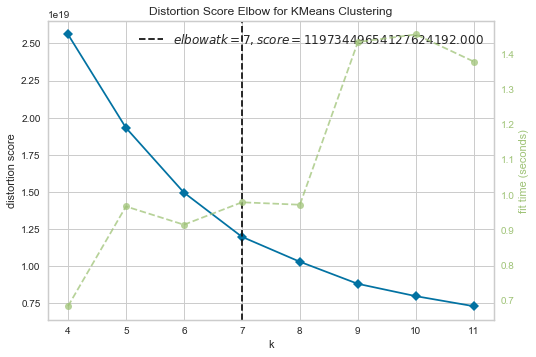

In [29]:


from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(X2)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### Creating our clustering model below:

In [30]:
# Import KMeans
from sklearn.cluster import KMeans

model = KMeans(n_clusters=7)

# Fit model to points
model.fit(X2)

# Determine the cluster labels of new_points: labels
labels = model.predict(X2)

# Print cluster labels of new_points
print(labels)

[3 1 0 ... 0 0 0]


In [31]:
df_combined['Label'] = labels 
print (df_combined['Label'])

0        3
1        1
2        0
3        6
4        6
        ..
45187    0
45188    0
45189    0
45190    0
45191    0
Name: Label, Length: 45192, dtype: int32


### Let's redefine X2 with our labels included so that we can include it in our visualizations later and call that X3. We can also throw in our binarized genres as well. 



In [32]:
X3 = df_combined[['Label', 'budget_y',
'release_date_y',
'revenue_y',
'runtime_y',
'vote_average_y',
'vote_count_y', 
'Action', 
'Adventure', 
'Animation', 
'Comedy', 
'Documentary', 
'Crime',
'Drama',
'Family',
'Fantasy',
'Foreign',
'History',
'Horror',
'Music',
'Mystery',
'Romance',
'Science Fiction',
'Thriller',
'War',
'Western']]


### Since we have so many columns and variables we are using for our analysis, I will use TSNE to represents higher data in two dimensions to help us with our clustering. 

### Trying TSNE to get all the clusters onto a two dimensional view 

In [33]:
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(X2)

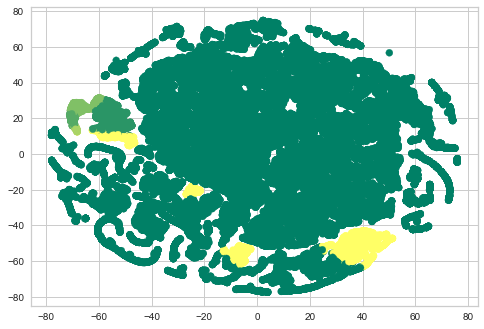

In [34]:
# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = labels, cmap = 'summer')
plt.show()

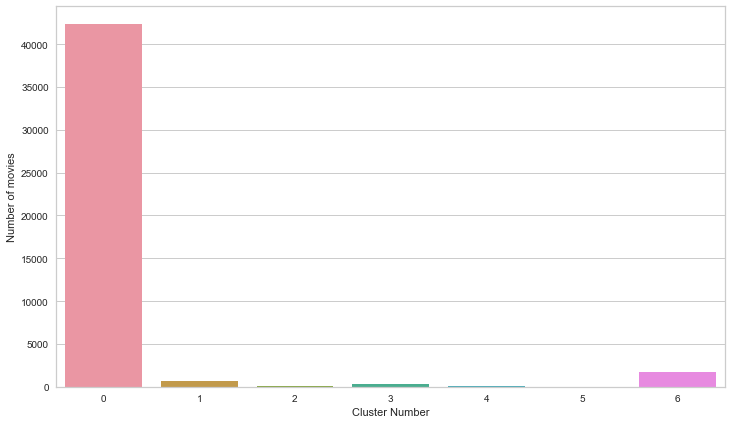

In [35]:


plt.figure(figsize=(12,7))
axis = sns.barplot(x= np.arange(0,7,1),y=df_combined.groupby(['Label']).count()['budget_y'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


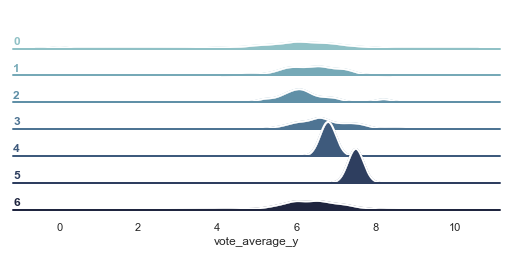

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Romance'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


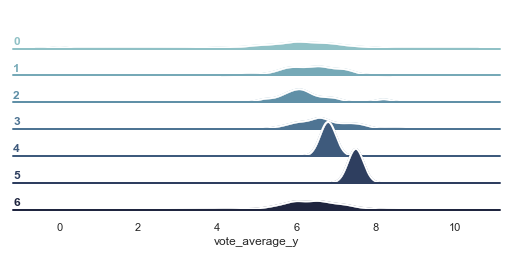

In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Romance'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


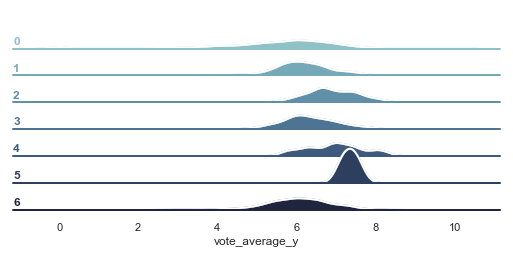

In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Action'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


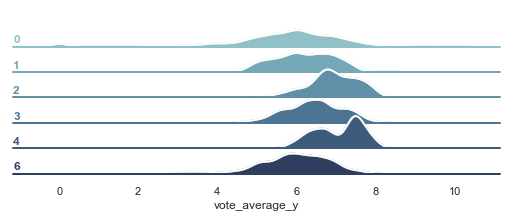

In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Family'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


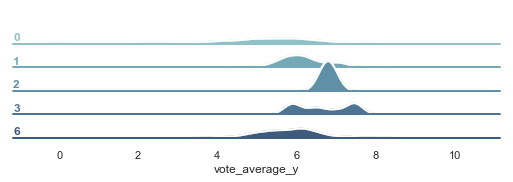

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Horror'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:211: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


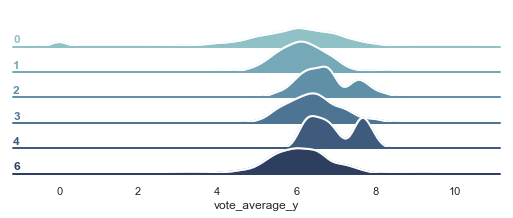

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})


# Create the data
df = X3[X3['Comedy'] == 1][['vote_average_y', 'Label']] 

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(7, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="Label", hue="Label", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, 'vote_average_y', clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'vote_average_y')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

### We see that one cluster which is also the smallest, is the cluster of movies that received maximum number of votes(in terms of counts) and also have very high popularity and total runtime and net revenue. Let's see some of the movies that belong to this cluster.

In [42]:
size_array = list(df_combined.groupby(['Label']).count()['budget_y'].values)
size_array

[42308, 678, 113, 294, 51, 3, 1745]

In [43]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[0])].sample(3)


Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
14601       1          1          0        0          0                     0   
1640        0          0          0        0          0                     0   
26543       1          1          0        0          0                     0   

       Comedy  Crime  Documentary  Drama  ...  video  vote_average_x  \
14601       0      0            0      0  ...  False             7.2   
1640        0      0            0      1  ...  False             7.5   
26543       0      0            0      0  ...  False             7.5   

       vote_count_x     budget_y  vote_average_y  vote_count_y     revenue_y  \
14601       12114.0  237000000.0             7.2       12114.0  2.787965e+09   
1640         7770.0  200000000.0             7.5        7770.0  1.845034e+09   
26543        7993.0  245000000.0             7.5        7993.0  2.068224e+09   

       runtime_y  release_date_y  Label  
14601      162.0          2009.0      5  
1640       194.0          1997.0      5  
26543      136.0          2015.0      5  

[3 rows x 63 columns]

In [44]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[1])].sample(5)


Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
42019       0          0          0        0          0                     0   
20006       1          1          0        0          0                     0   
2514        1          1          0        0          0                     0   
17861       1          1          0        0          0                     0   
30656       0          1          1        0          0                     0   

       Comedy  Crime  Documentary  Drama  ...  video  vote_average_x  \
42019       0      0            0      0  ...  False             6.8   
20006       0      0            0      0  ...  False             7.0   
2514        0      0            0      0  ...  False             6.4   
17861       0      0            0      0  ...  False             7.4   
30656       1      0            0      0  ...  False             6.4   

       vote_count_x     budget_y  vote_average_y  vote_count_y     revenue_y  \
42019        5530.0  160000000.0             6.8        5530.0  1.262886e+09   
20006        8427.0  250000000.0             7.0        8427.0  1.021104e+09   
2514         4526.0  115000000.0             6.4        4526.0  9.243176e+08   
17861       12000.0  220000000.0             7.4       12000.0  1.519558e+09   
30656        4729.0   74000000.0             6.4        4729.0  1.156731e+09   

       runtime_y  release_date_y  Label  
42019      129.0          2017.0      4  
20006      169.0          2012.0      4  
2514       136.0          1999.0      4  
17861      143.0          2012.0      4  
30656       91.0          2015.0      4  

[5 rows x 63 columns]

In [45]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[-1])].sample(5)


Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
18326       0          0          0        0          0                     0   
34470       0          0          0        0          0                     0   
36085       0          0          0        0          0                     0   
39270       0          0          0        0          0                     0   
40726       0          0          0        0          0                     0   

       Comedy  Crime  Documentary  Drama  ...  video  vote_average_x  \
18326       1      0            0      1  ...  False             5.6   
34470       0      0            0      1  ...  False             6.8   
36085       0      0            0      1  ...  False             6.4   
39270       0      0            1      0  ...  False             5.3   
40726       0      0            0      1  ...  False             0.0   

       vote_count_x    budget_y  vote_average_y  vote_count_y   revenue_y  \
18326         368.0  12000000.0             5.6         368.0  22939027.0   
34470           3.0         0.0             6.8           3.0         0.0   
36085         181.0   8500000.0             6.4         181.0  15861566.0   
39270           2.0    500000.0             5.3           2.0         0.0   
40726           0.0         0.0             0.0           0.0         0.0   

       runtime_y  release_date_y  Label  
18326       94.0          2011.0      0  
34470      151.0          1960.0      0  
36085      120.0          2016.0      0  
39270       93.0          2001.0      0  
40726      118.0          2012.0      0  

[5 rows x 63 columns]

In [46]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[-2])].sample(5)


Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
12349       1          0          0        0          0                     0   
16580       0          0          0        0          0                     0   
31861       1          1          0        0          0                     0   
11153       0          0          0        0          0                     0   
9644        0          0          0        0          0                     0   

       Comedy  Crime  Documentary  Drama  ...  video  vote_average_x  \
12349       0      0            0      1  ...  False             4.0   
16580       1      0            0      1  ...  False             5.2   
31861       0      0            0      0  ...  False             7.5   
11153       1      0            0      1  ...  False             7.1   
9644        0      0            0      1  ...  False             7.3   

       vote_count_x    budget_y  vote_average_y  vote_count_y    revenue_y  \
12349         104.0  70000000.0             4.0         104.0   53587404.0   
16580         306.0  70000000.0             5.2         306.0   67112664.0   
31861         138.0  40000000.0             7.5         138.0  100000000.0   
11153         743.0  30000000.0             7.1         743.0   53653224.0   
9644          510.0  30000000.0             7.3         510.0   76669806.0   

       runtime_y  release_date_y  Label  
12349       90.0          2007.0      6  
16580      111.0          2011.0      6  
31861      159.0          2015.0      6  
11153      113.0          2006.0      6  
9644       136.0          2005.0      6  

[5 rows x 63 columns]

In [47]:
df_combined[df_combined['Label']==size_array.index(sorted(size_array)[2])].sample(5)


Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
24456       1          1          1        0          0                     0   
12737       0          0          1        0          0                     0   
23559       1          1          1        0          0                     0   
17541       0          1          1        0          0                     0   
18330       1          1          0        0          0                     0   

       Comedy  Crime  Documentary  Drama  ...  video  vote_average_x  \
24456       1      0            0      0  ...  False             7.8   
12737       0      0            0      0  ...  False             7.8   
23559       1      0            0      0  ...  False             7.6   
17541       1      0            0      0  ...  False             5.5   
18330       0      0            0      0  ...  False             6.8   

       vote_count_x     budget_y  vote_average_y  vote_count_y    revenue_y  \
24456        6289.0  165000000.0             7.8        6289.0  652105443.0   
12737        6439.0  180000000.0             7.8        6439.0  521311860.0   
23559        3163.0  145000000.0             7.6        3163.0  609123048.0   
17541        1201.0  110000000.0             5.5        1201.0  563749323.0   
18330        4026.0  145000000.0             6.8        4026.0  694713380.0   

       runtime_y  release_date_y  Label  
24456      102.0          2014.0      2  
12737       98.0          2008.0      2  
23559      102.0          2014.0      2  
17541      103.0          2011.0      2  
18330      133.0          2011.0      2  

[5 rows x 63 columns]

In [48]:
Label_mask = (df_combined['Label'] == 1) #&(X['Drama'] == 1)&(X['Action'] == 1)

df_combined[Label_mask].sample(15)

Action  Adventure  Animation  Aniplex  BROSTA TV  Carousel Productions  \
2265        0          0          0        0          0                     0   
6038        0          1          1        0          0                     0   
11158       1          1          0        0          0                     0   
489         1          1          0        0          0                     0   
12113       1          0          0        0          0                     0   
4366        0          0          0        0          0                     0   
2297        0          0          0        0          0                     0   
8158        1          0          0        0          0                     0   
2993        1          0          0        0          0                     0   
10999       1          1          0        0          0                     0   
8107        1          1          0        0          0                     0   
41821       1          1          0        0          0                     0   
39077       1          0          0        0          0                     0   
14544       0          0          0        0          0                     0   
13424       0          0          0        0          0                     0   

       Comedy  Crime  Documentary  Drama  ...  video  vote_average_x  \
2265        1      1            0      0  ...  False             6.5   
6038        0      0            0      0  ...  False             5.6   
11158       0      1            0      0  ...  False             5.7   
489         0      0            0      1  ...  False             5.8   
12113       0      0            0      0  ...  False             6.1   
4366        0      0            0      1  ...  False             5.7   
2297        0      0            0      1  ...  False             6.6   
8158        0      0            0      0  ...  False             6.1   
2993        0      1            0      1  ...  False             6.4   
10999       0      0            0      1  ...  False             5.5   
8107        0      0            0      0  ...  False             5.6   
41821       1      0            0      0  ...  False             5.9   
39077       1      0            0      0  ...  False             6.2   
14544       0      0            0      1  ...  False             7.0   
13424       1      0            0      1  ...  False             6.2   

       vote_count_x     budget_y  vote_average_y  vote_count_y    revenue_y  \
2265          614.0    4500000.0             6.5         614.0  146198896.0   
6038          278.0   20000000.0             5.6         278.0  135680000.0   
11158         494.0  135000000.0             5.7         494.0  163794509.0   
489           261.0   55000000.0             5.8         261.0  121969216.0   
12113        1308.0   45000000.0             6.1        1308.0  148412065.0   
4366          330.0   20000000.0             5.7         330.0  171504781.0   
2297          894.0   17000000.0             6.6         894.0  270000000.0   
8158         1286.0   45000000.0             6.1        1286.0  129394835.0   
2993          360.0   75000000.0             6.4         360.0  152368585.0   
10999         594.0  160000000.0             5.5         594.0  181674817.0   
8107         1241.0   70000000.0             5.6        1241.0  171183863.0   
41821          50.0   65000000.0             5.9          50.0  254212245.0   
39077        1699.0   50000000.0             6.2        1699.0  216972543.0   
14544        1150.0   60000000.0             7.0        1150.0  122233971.0   
13424         988.0   40000000.0             6.2         988.0  177259441.0   

       runtime_y  release_date_y  Label  
2265        96.0          1984.0      1  
6038        72.0          2003.0      1  
11158      134.0          2006.0      1  
489        133.0          1996.0      1  
12113       94.0          2007.0      1  
4366       104.0          1988.0      1 

### Let's get a sense for how the Labels are showing up at a high level for us across our categories:

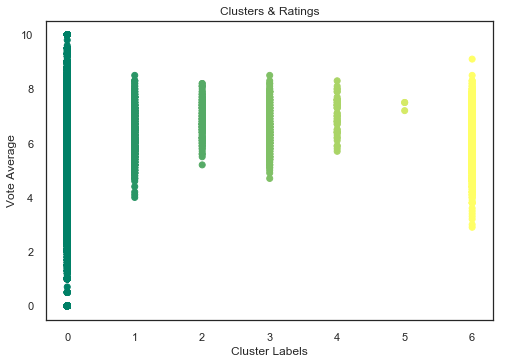

In [49]:
plt.scatter(X3['Label'], X3['vote_average_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Ratings")
plt.xlabel("Cluster Labels")
plt.ylabel("Vote Average")
plt.show()

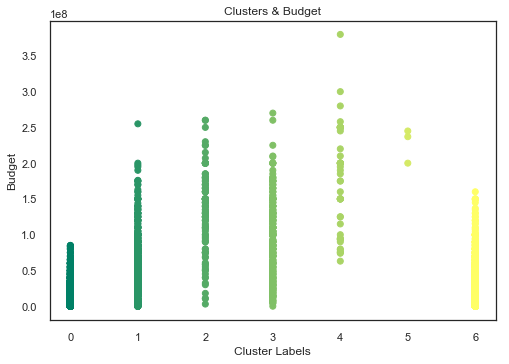

In [50]:
plt.scatter(X3['Label'], X3['budget_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Budget")
plt.xlabel("Cluster Labels")
plt.ylabel("Budget")
plt.show()

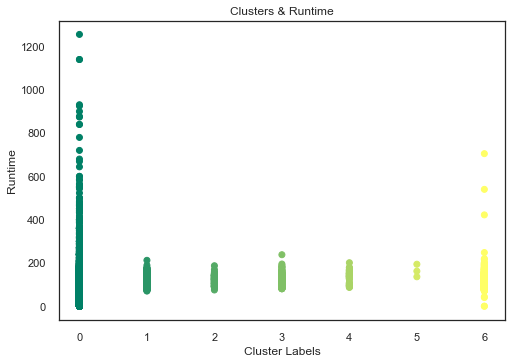

In [51]:
plt.scatter(X3['Label'], X3['runtime_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Runtime")
plt.xlabel("Cluster Labels")
plt.ylabel("Runtime")
plt.show()

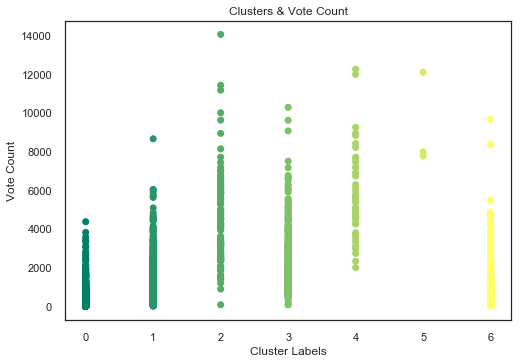

In [52]:
plt.scatter(X3['Label'], X3['vote_count_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Vote Count")
plt.xlabel("Cluster Labels")
plt.ylabel("Vote Count")
plt.show()

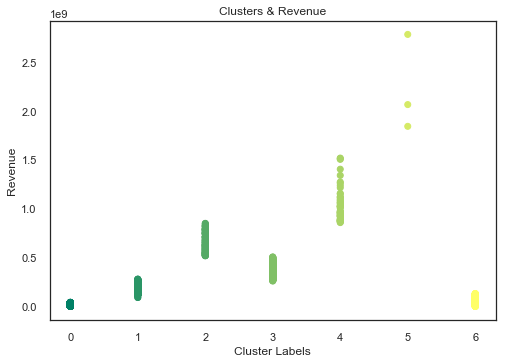

In [53]:
plt.scatter(X3['Label'], X3['revenue_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Revenue")
plt.xlabel("Cluster Labels")
plt.ylabel("Revenue")
plt.show()

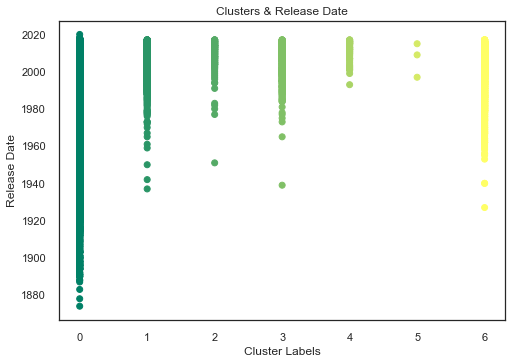

In [54]:
plt.scatter(X3['Label'], X3['release_date_y'], c = labels, cmap = 'summer' )
plt.title("Clusters & Release Date")
plt.xlabel("Cluster Labels")
plt.ylabel("Release Date")
plt.show()


### And now let's get to know our clusters individually.
<br>

### Starting below with our first cluster A 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


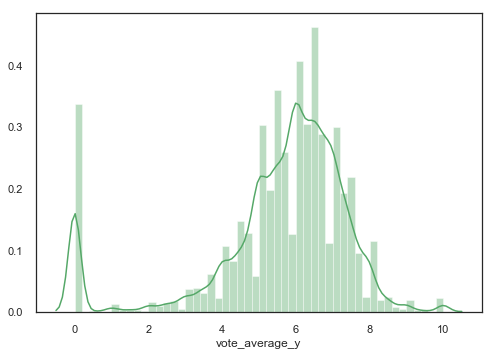

In [55]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'g')

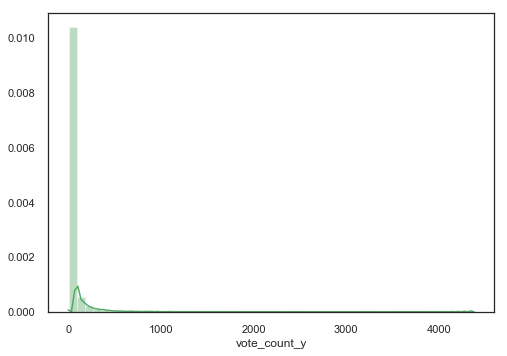

In [56]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'g')



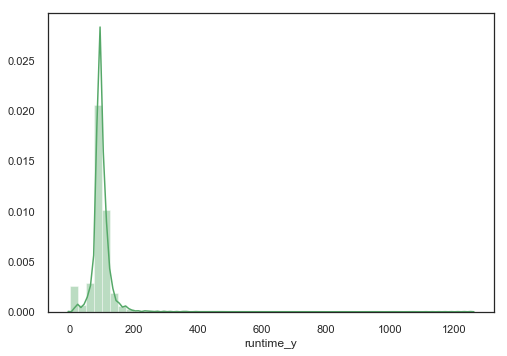

In [57]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'g')



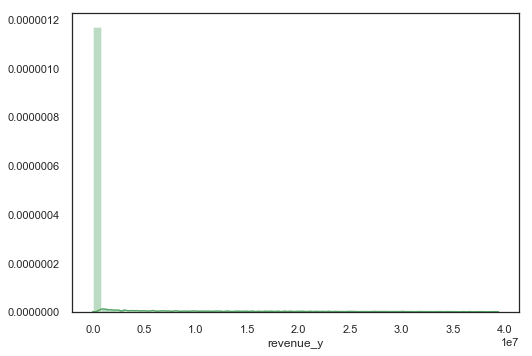

In [58]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'g')



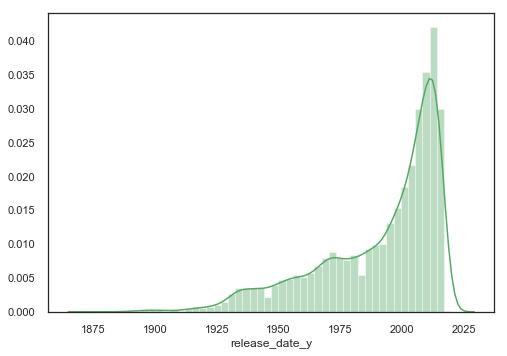

In [59]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'g')



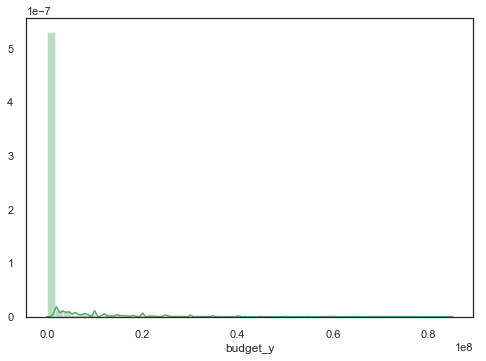

In [60]:
Western_mask = (X3['Label'] == 0) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'g')



### Cluster B:

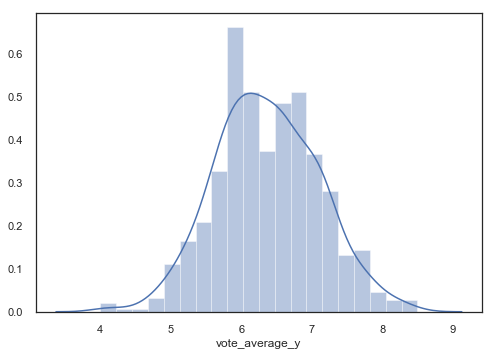

In [61]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')


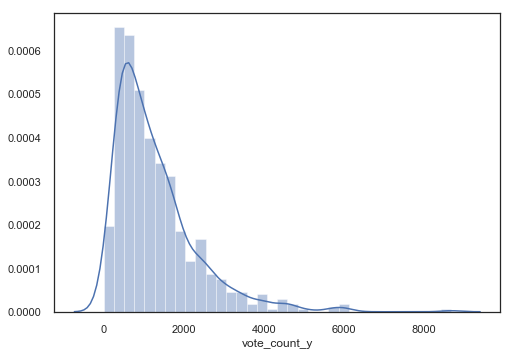

In [62]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'b')

#change bin size for distribution. bins = np.arrange or lin space to generate some evenly spaced bins. 


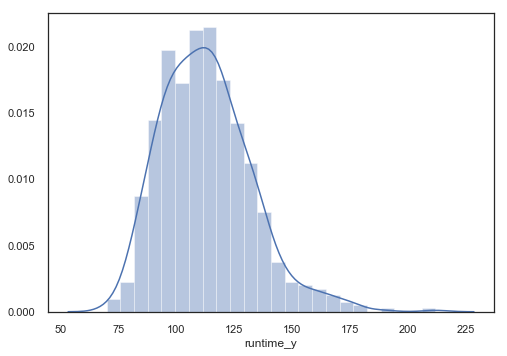

In [63]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'b')



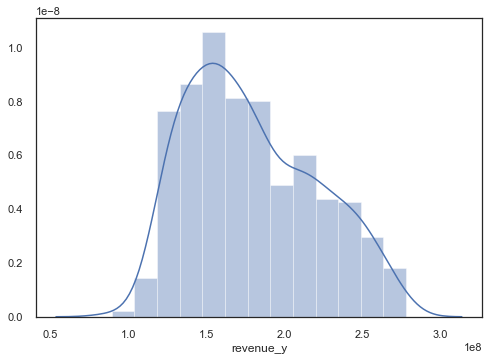

In [64]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'b')


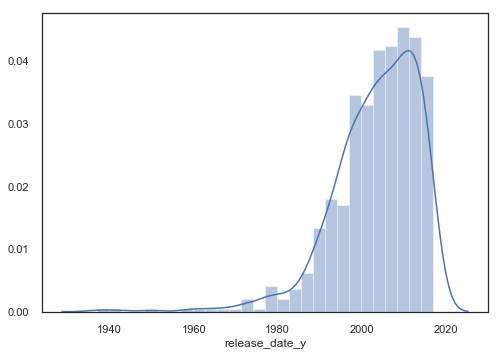

In [65]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'b')


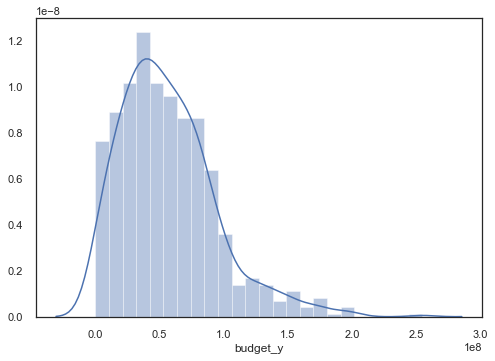

In [66]:
Western_mask = (X3['Label'] == 1) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'b')


### Cluster C:

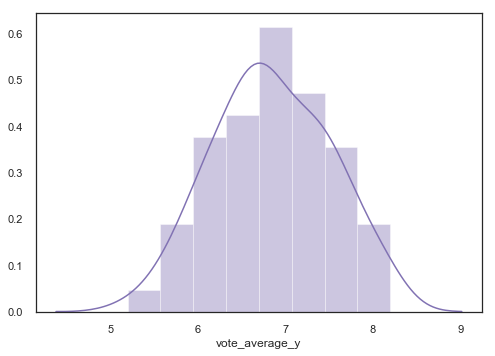

In [67]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'm')

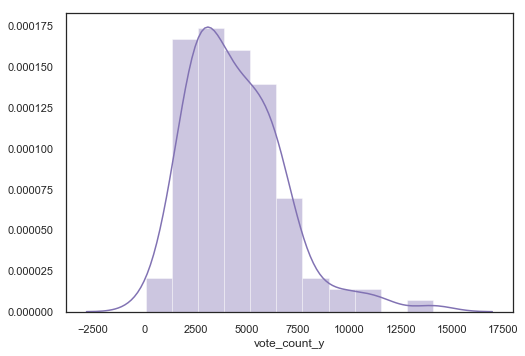

In [68]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

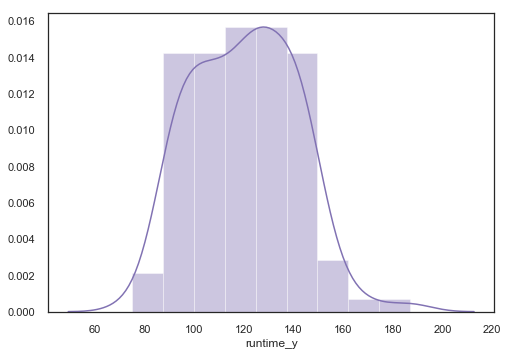

In [69]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

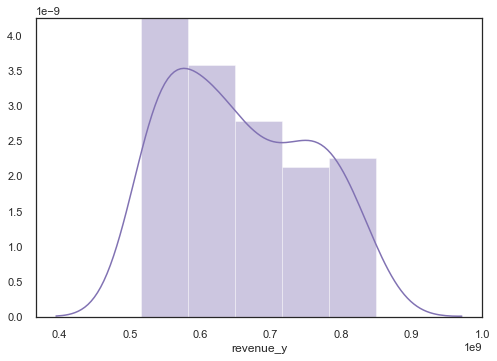

In [70]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

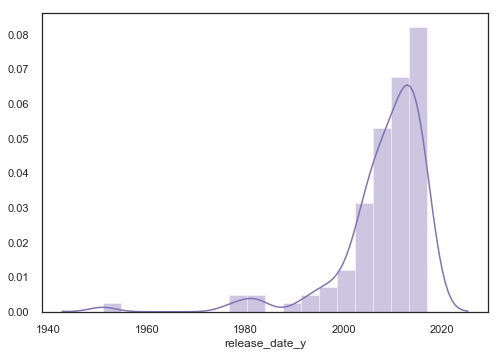

In [71]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

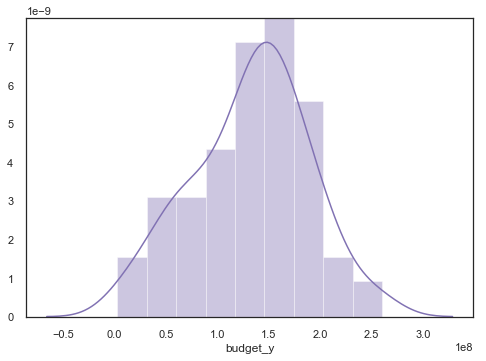

In [72]:
Western_mask = (X3['Label'] == 2) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'm')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

### Cluster D:


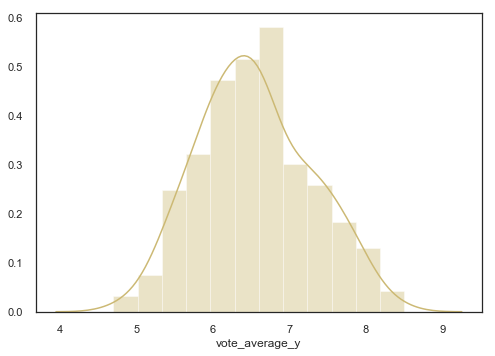

In [73]:

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'y')

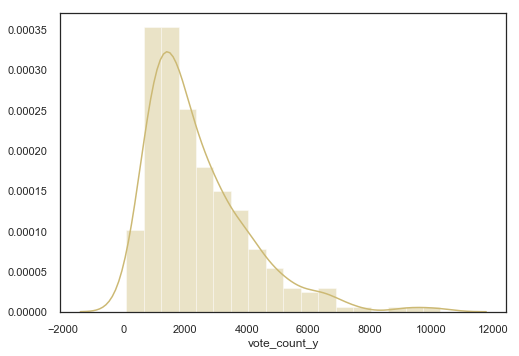

In [74]:

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

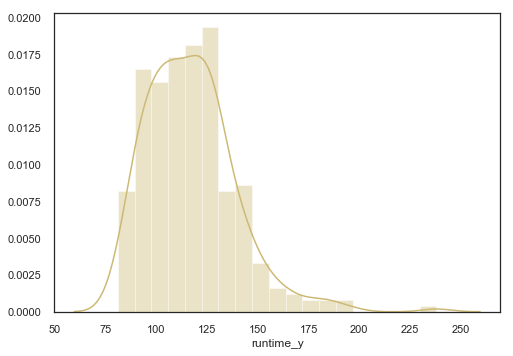

In [75]:
Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

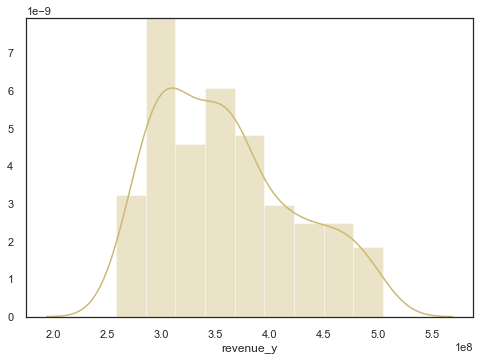

In [76]:
Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

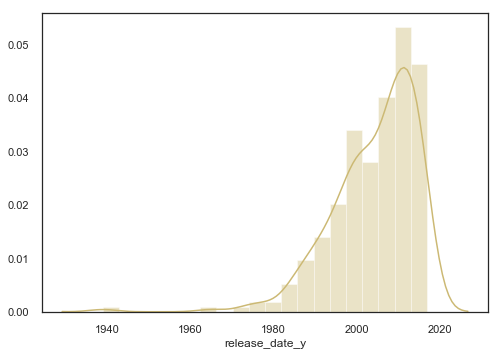

In [77]:
Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

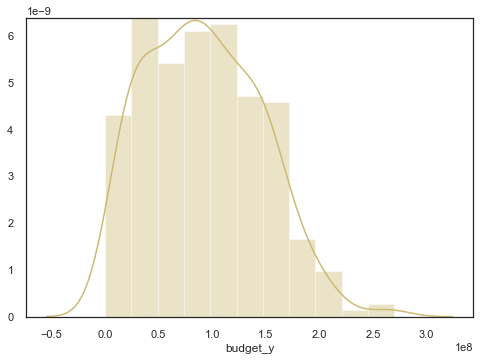

In [78]:
import seaborn as sns, numpy as np

Western_mask = (X3['Label'] == 3) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'y')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

### Cluster E

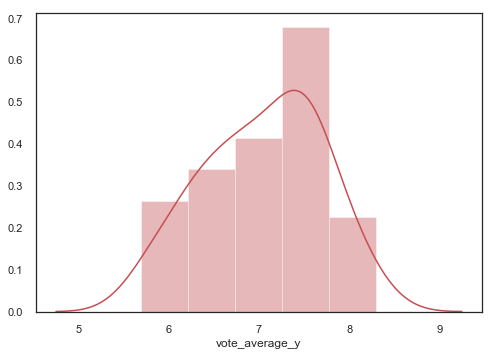

In [79]:
Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

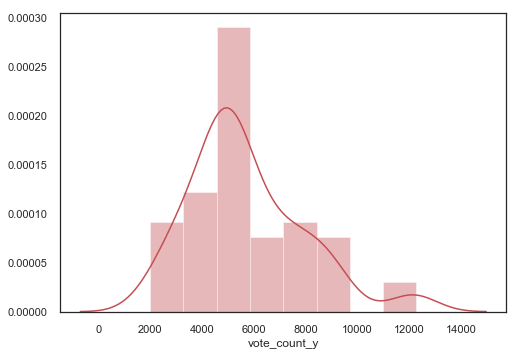

In [80]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

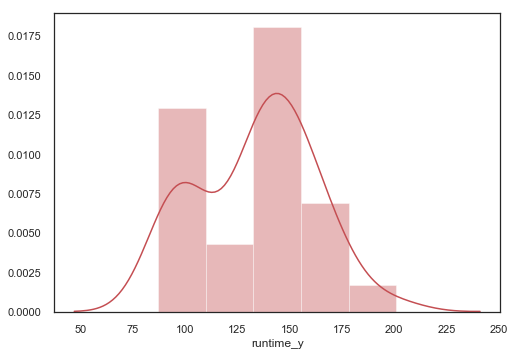

In [81]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

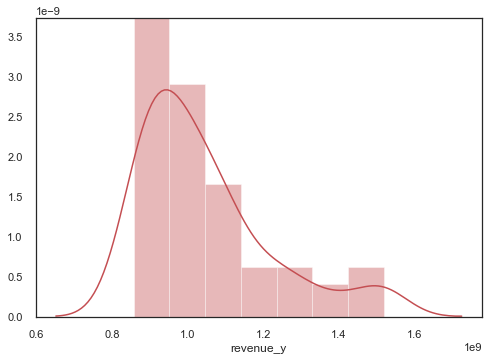

In [82]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

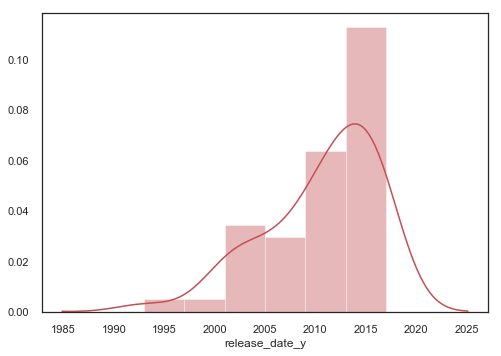

In [83]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

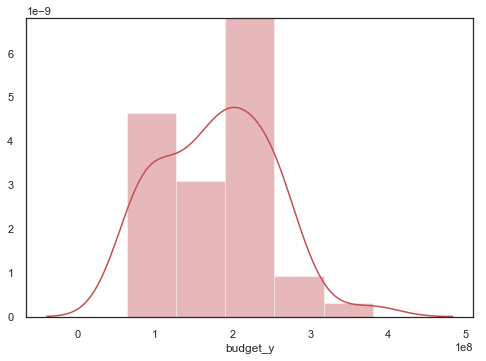

In [84]:

Western_mask = (X3['Label'] == 4) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'r')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

### Cluster F:

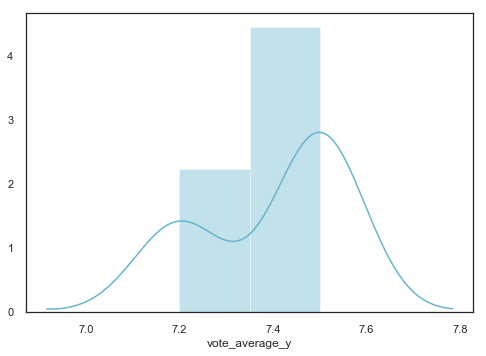

In [85]:

Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'c')

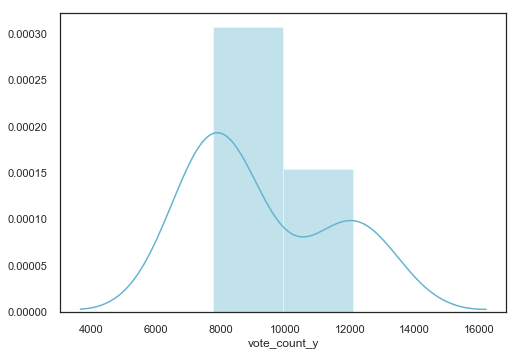

In [86]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

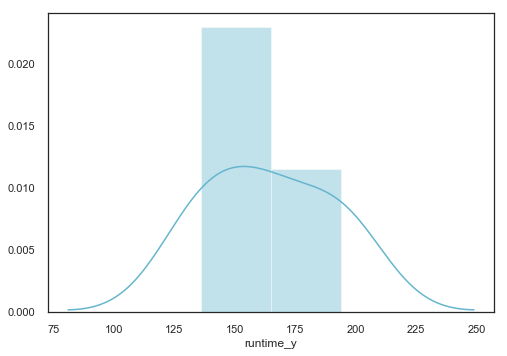

In [87]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

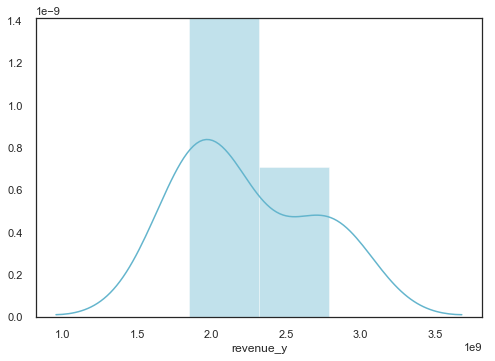

In [88]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


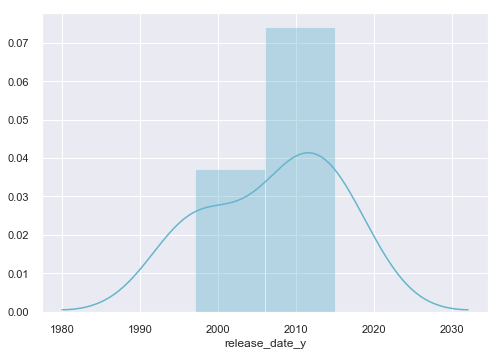

In [244]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

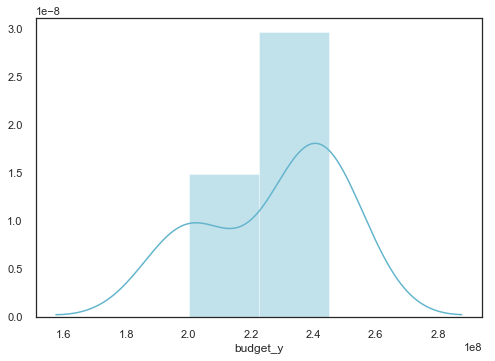

In [90]:
Western_mask = (X3['Label'] == 5) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'c')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

### Cluster F:

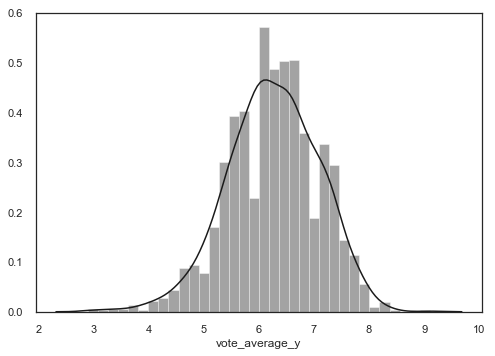

In [91]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'k')

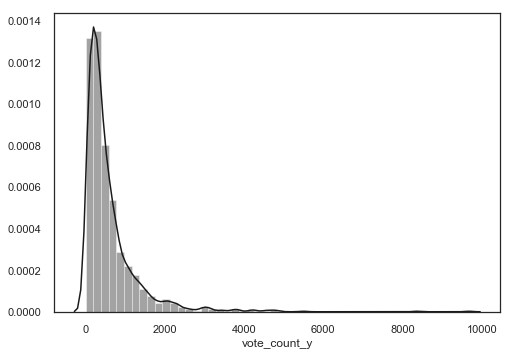

In [92]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_count_y'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

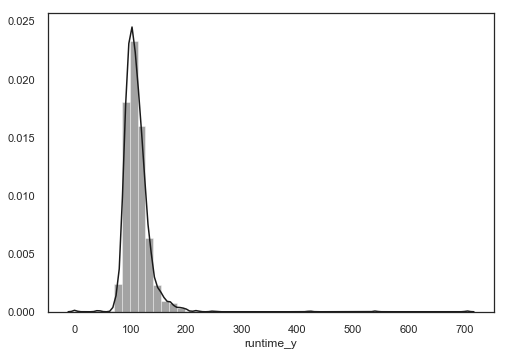

In [93]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['runtime_y'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

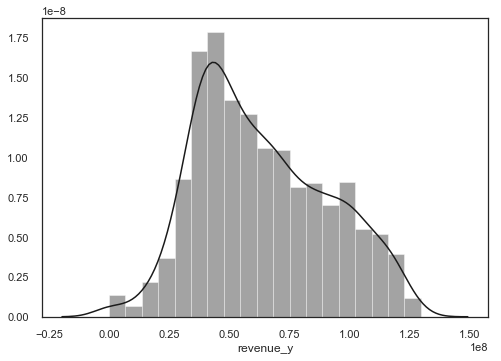

In [94]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['revenue_y'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

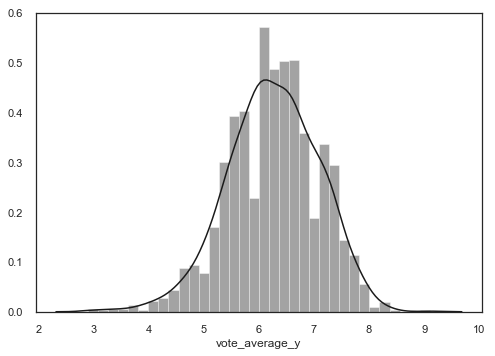

In [95]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

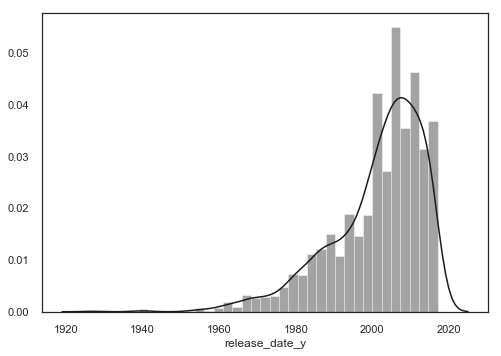

In [96]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['release_date_y'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

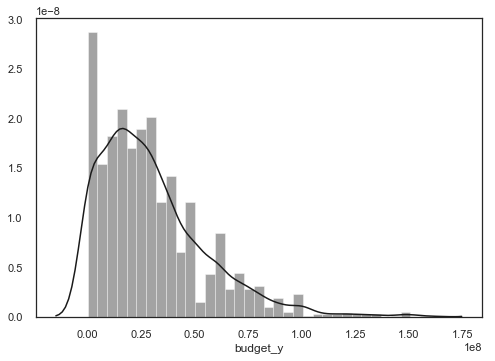

In [97]:
Western_mask = (X3['Label'] == 6) #&(X['Action'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Western_mask]['budget_y'], color= 'k')

#[['Label', 'budget',
#'release_date',
#'revenue',
#'runtime',
#'vote_count',]]

### Another view of our labels:

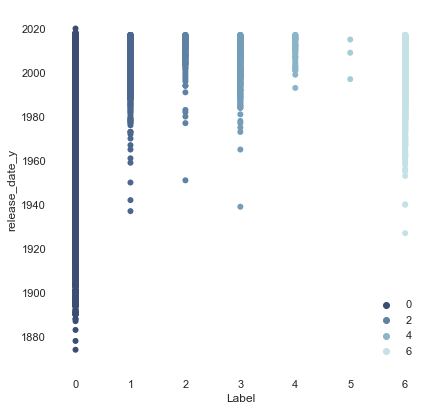

In [98]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['release_date_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)

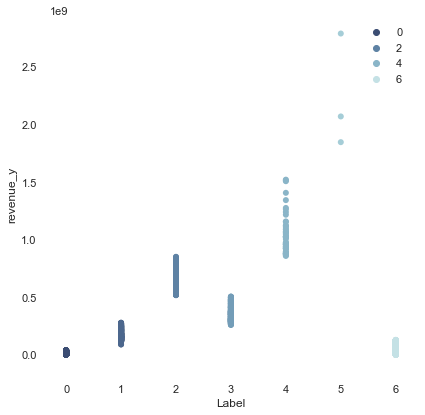

In [99]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['revenue_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)

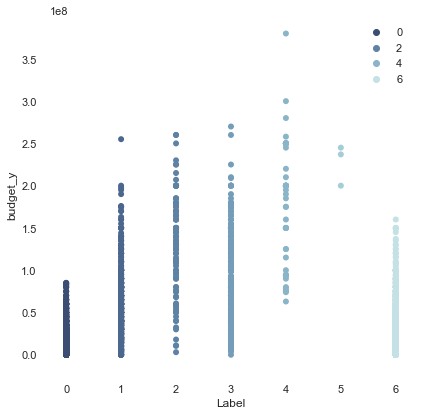

In [100]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['budget_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)



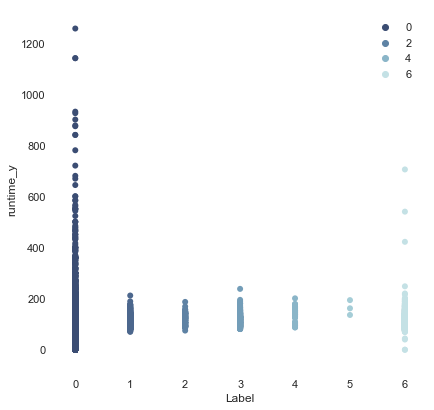

In [101]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['runtime_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)

 

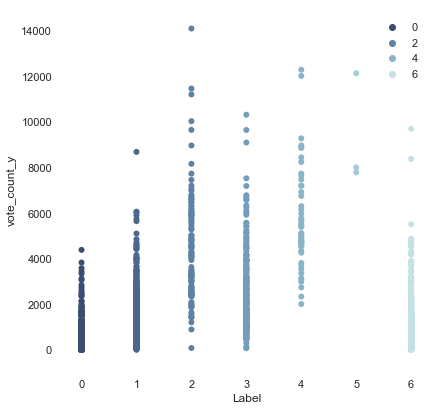

In [102]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['vote_count_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)


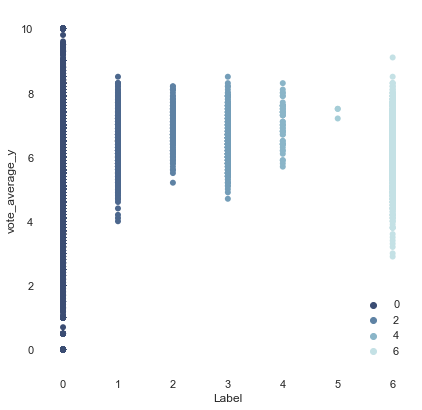

In [103]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = labels
sns.scatterplot(x=X3['Label'], y= X3['vote_average_y'],
                hue=labels,
                palette="ch:r=-.2,d=.3_r",
                
                sizes=(1, 8), linewidth=0,
                 ax=ax)


### Now let's look at our genres:

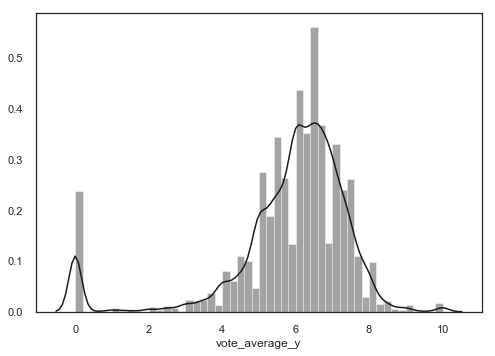

In [104]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

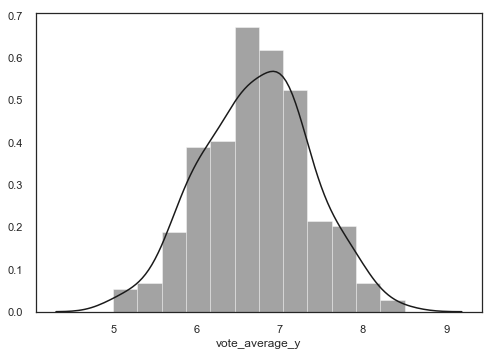

In [105]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

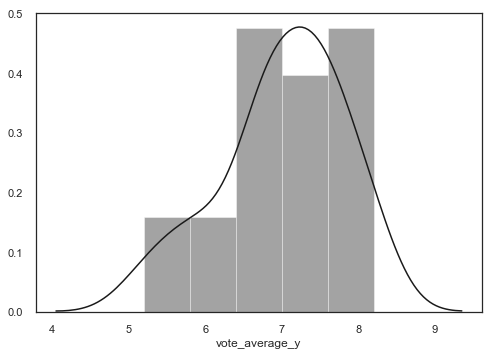

In [106]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

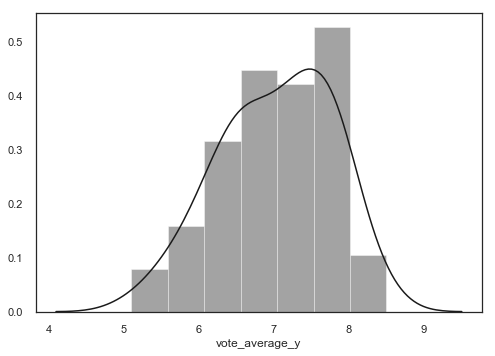

In [107]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

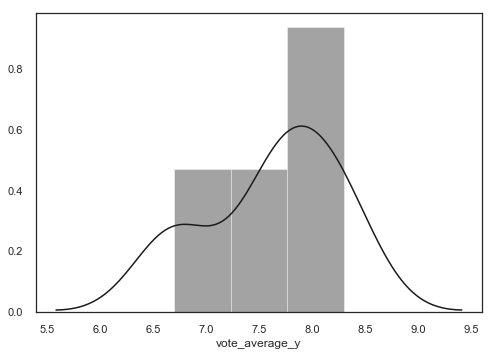

In [108]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


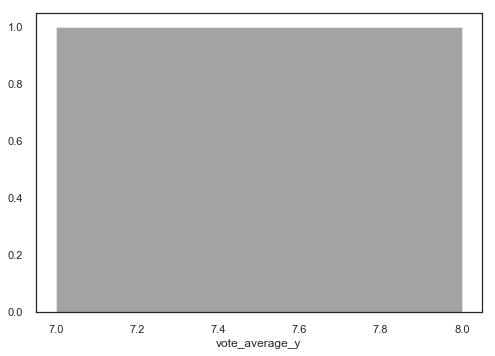

In [109]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

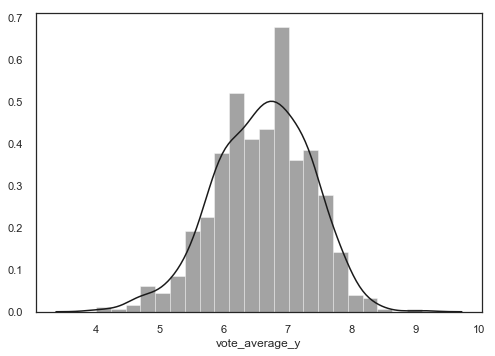

In [110]:
Drama_mask = (X3['Drama'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Drama_mask]['vote_average_y'], color= 'k')

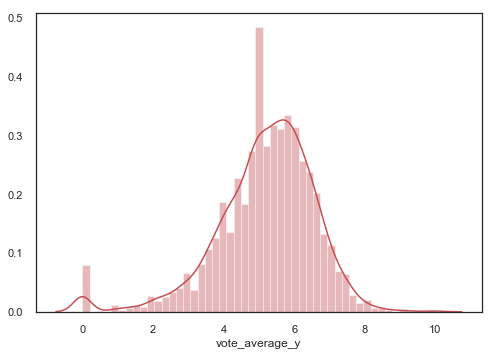

In [111]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

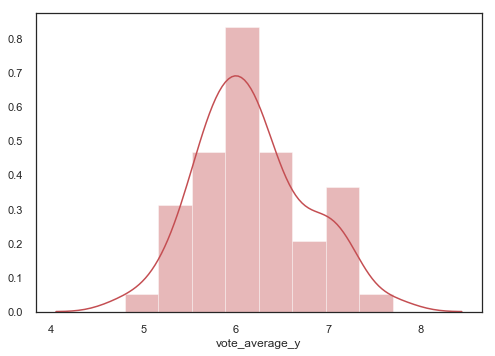

In [112]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

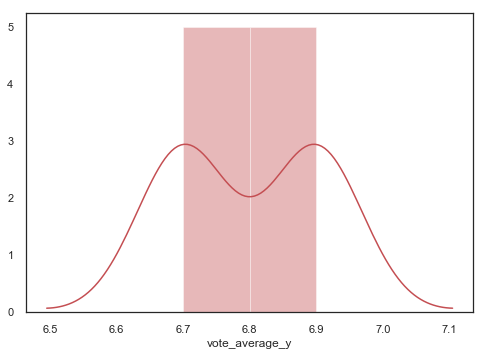

In [113]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

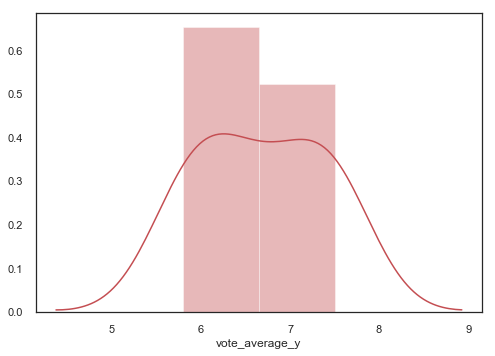

In [114]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:898: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


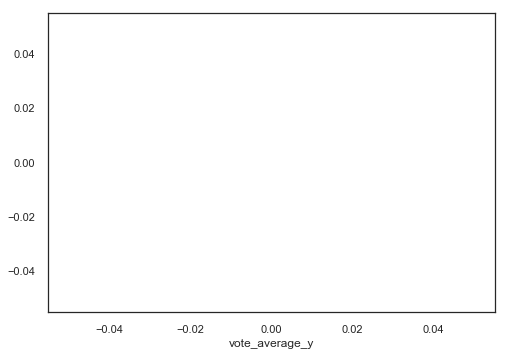

In [115]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

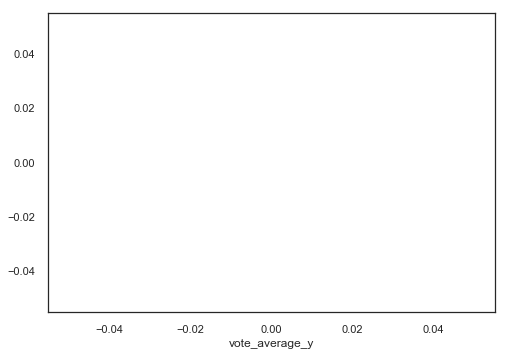

In [116]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

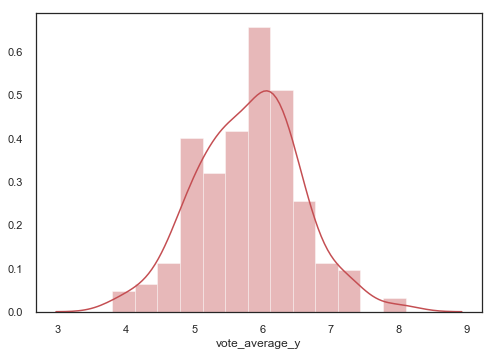

In [117]:
Horror_mask = (X3['Horror'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Horror_mask]['vote_average_y'], color= 'r')

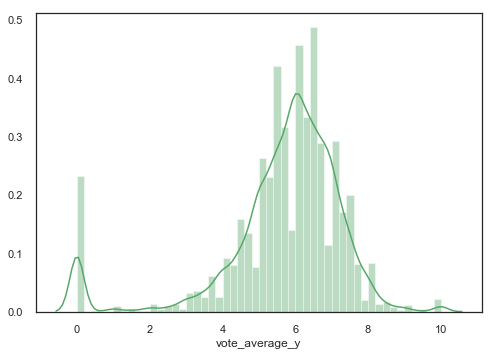

In [118]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

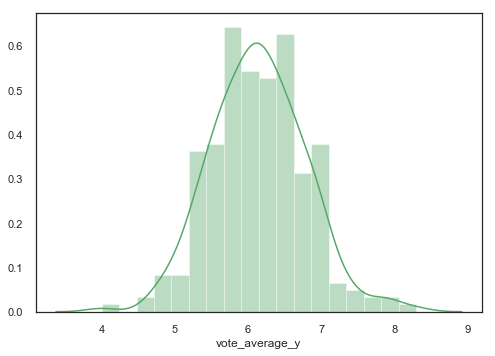

In [119]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

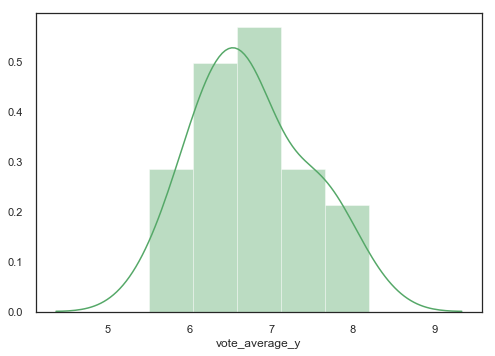

In [120]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

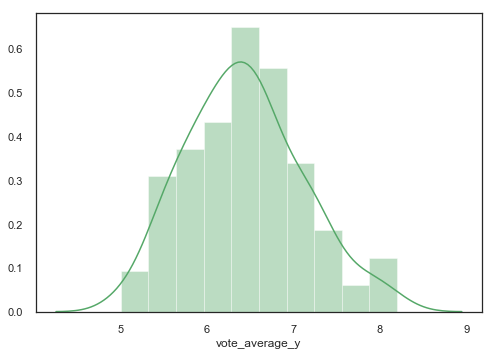

In [121]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

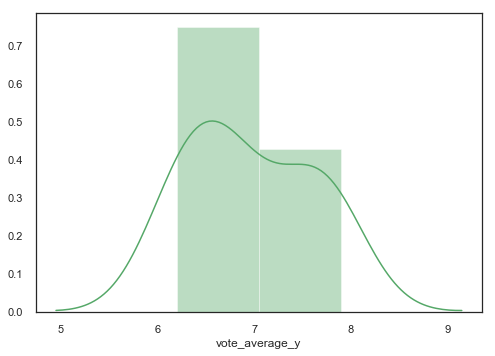

In [122]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

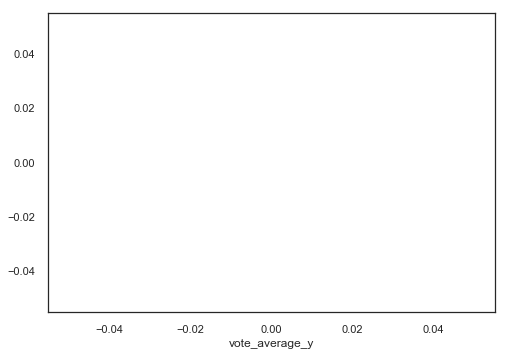

In [123]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

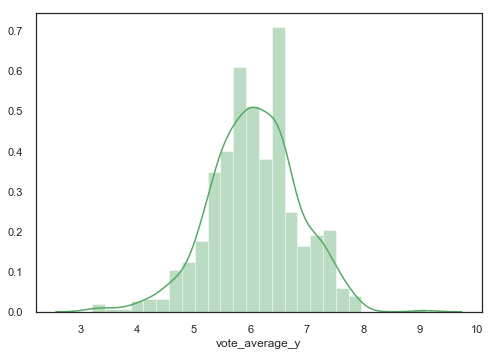

In [124]:
Comedy_mask = (X3['Comedy'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Comedy_mask]['vote_average_y'], color= 'g')

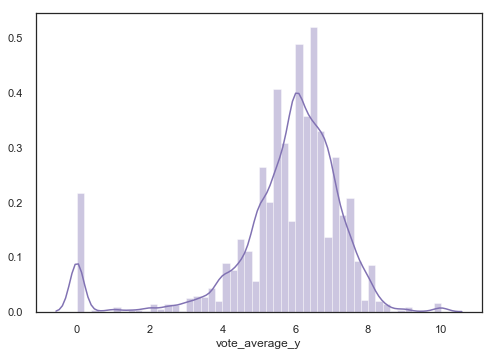

In [125]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

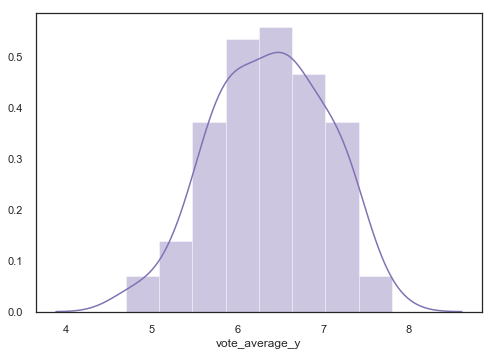

In [126]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

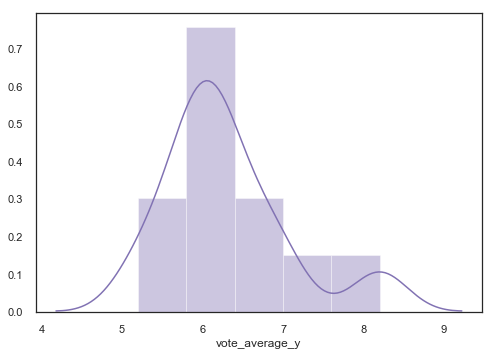

In [127]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

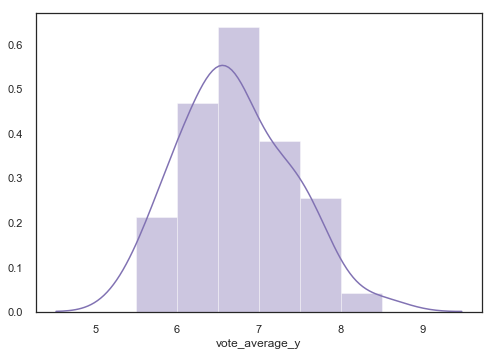

In [128]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

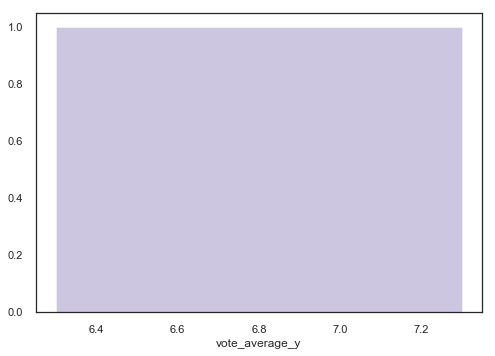

In [129]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

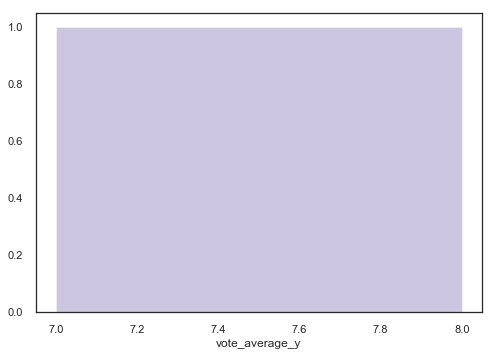

In [130]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

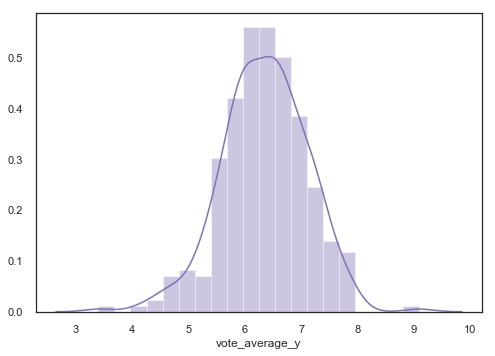

In [131]:
Romance_mask = (X3['Romance'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Romance_mask]['vote_average_y'], color= 'm')

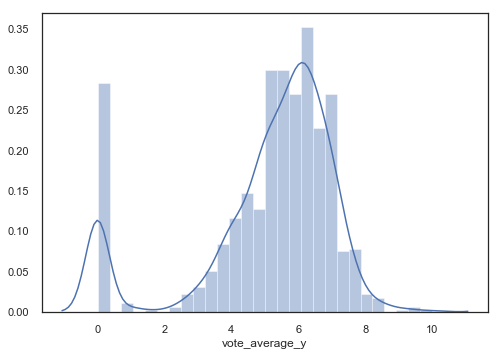

In [132]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 0) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

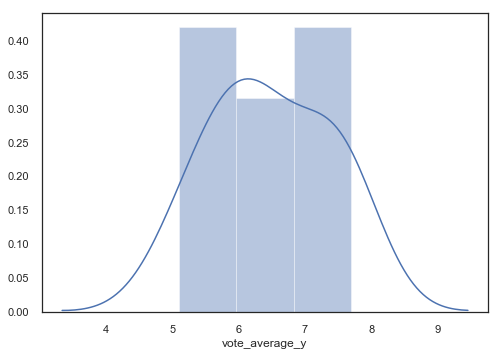

In [133]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 1) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

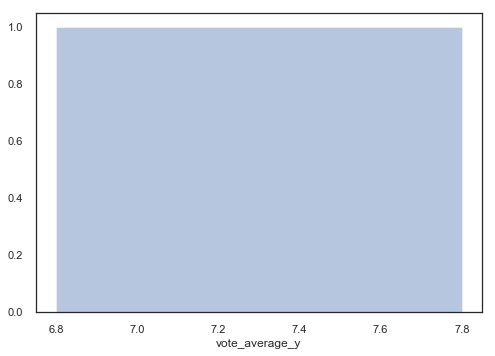

In [134]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 2) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

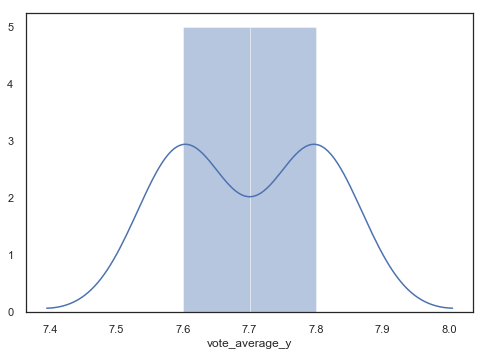

In [135]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 3) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

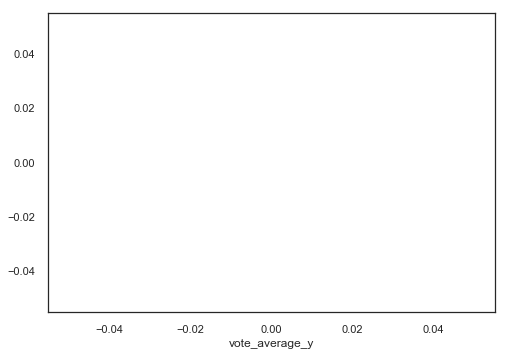

In [136]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 4) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

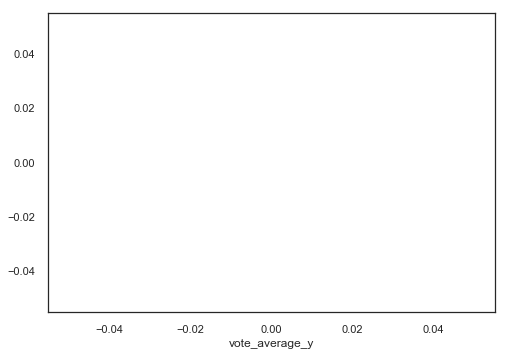

In [137]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 5) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

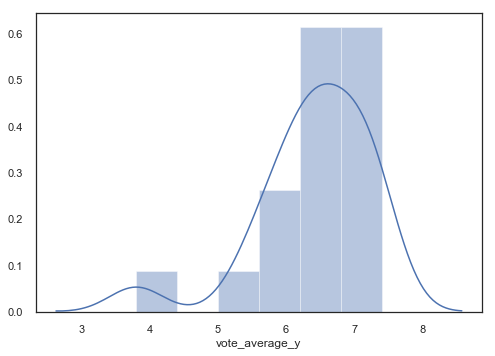

In [138]:
Western_mask = (X3['Western'] == 1) &(X3['Label'] == 6) 
ax = sns.distplot(X3[Western_mask]['vote_average_y'], color= 'b')

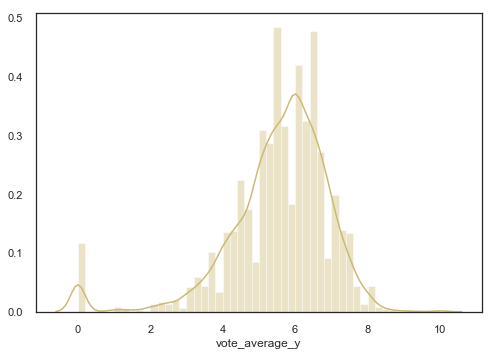

In [139]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

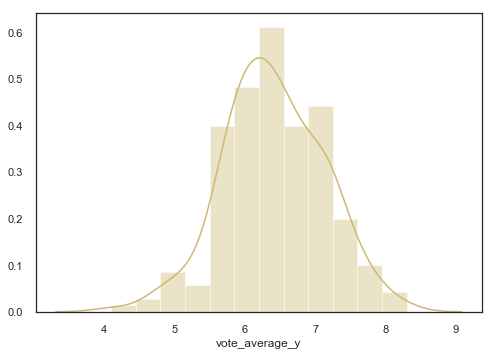

In [140]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

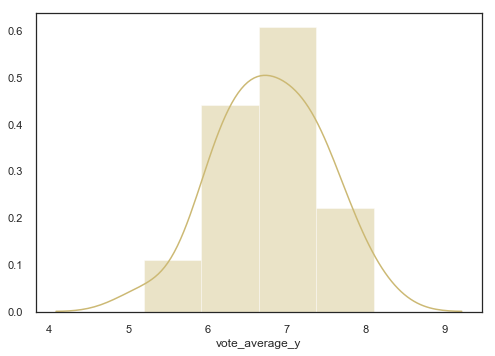

In [141]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

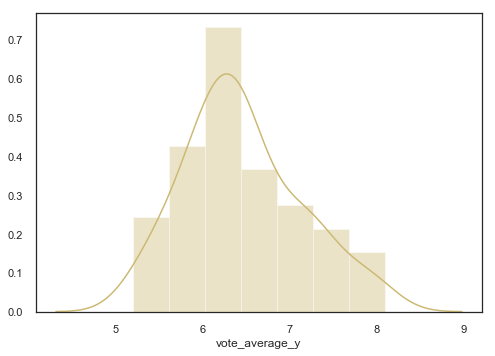

In [142]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

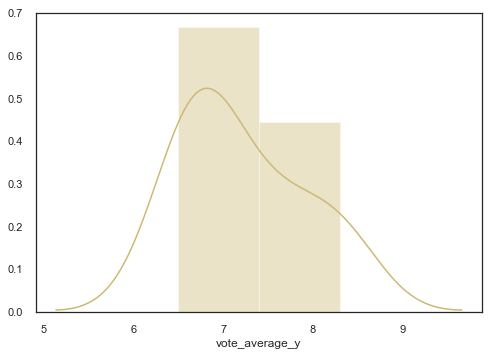

In [143]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

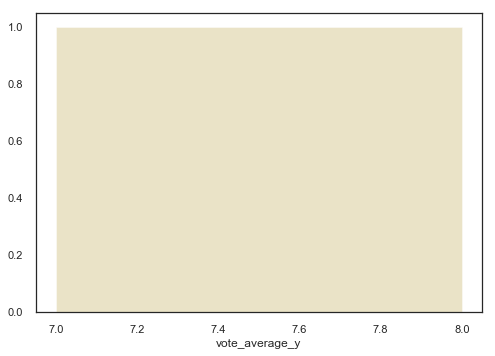

In [144]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

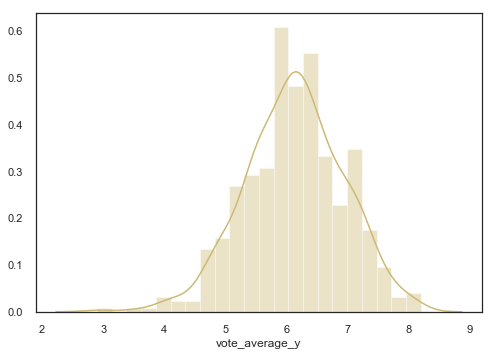

In [145]:

Thriller_mask = (X3['Thriller'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Thriller_mask]['vote_average_y'], color= 'y')

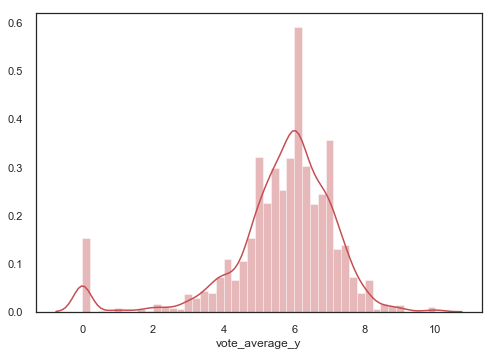

In [146]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

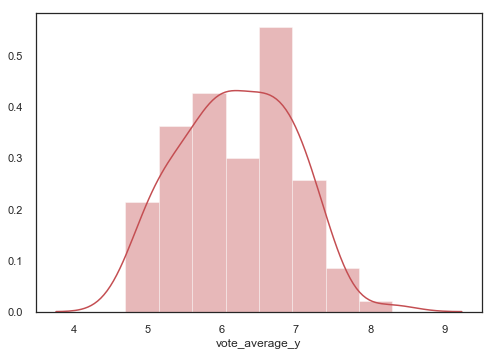

In [147]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

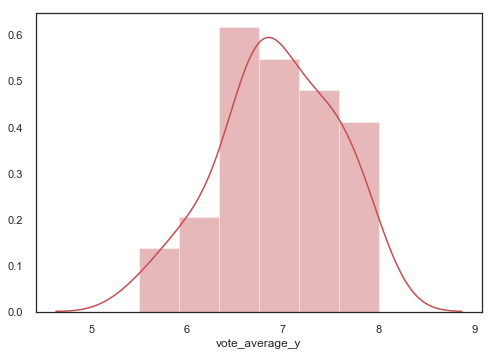

In [148]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

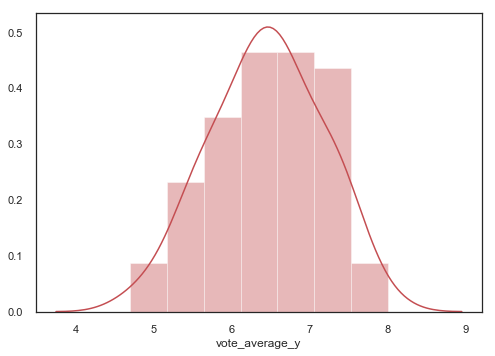

In [149]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

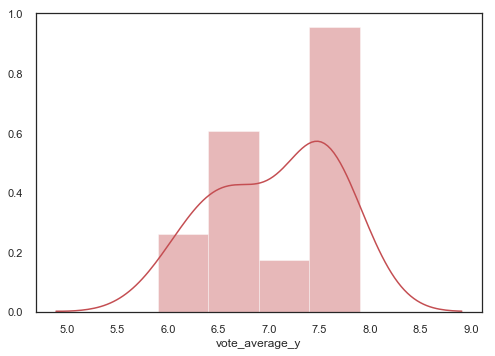

In [150]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

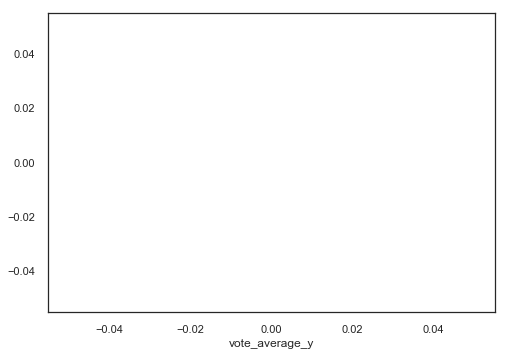

In [151]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

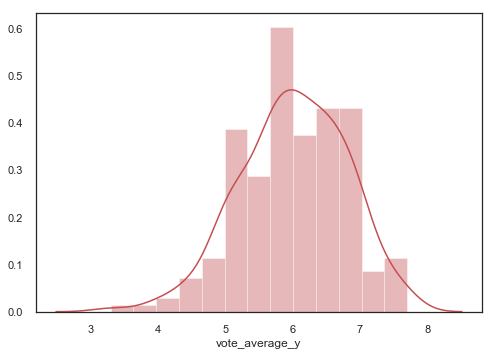

In [152]:

Family_mask = (X3['Family'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Family_mask]['vote_average_y'], color= 'r')

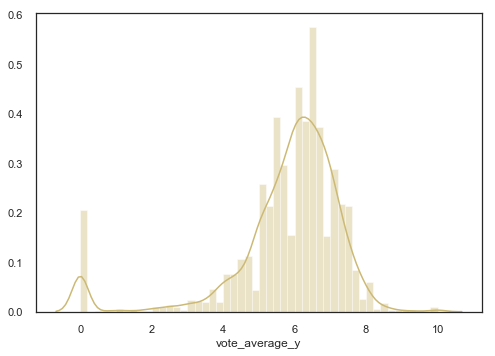

In [153]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

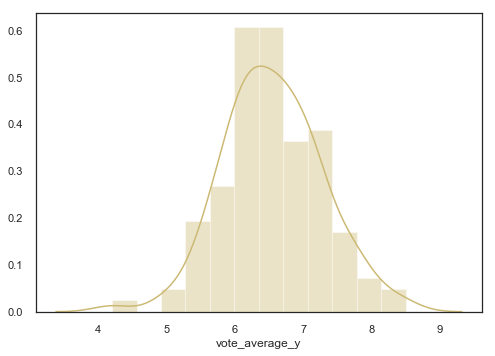

In [154]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

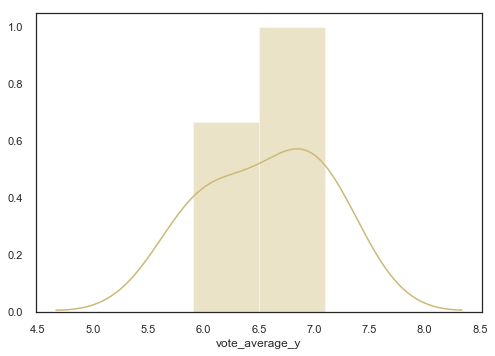

In [155]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

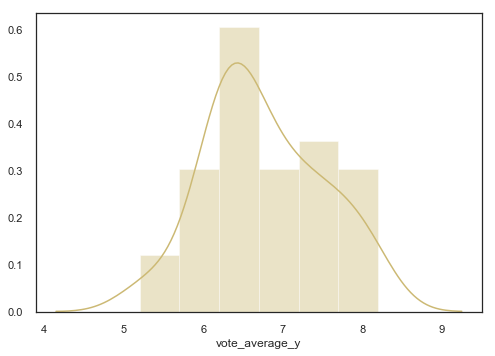

In [156]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

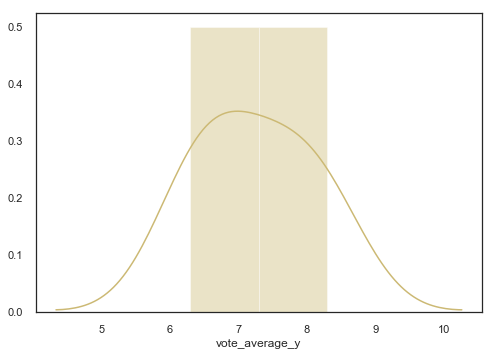

In [157]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

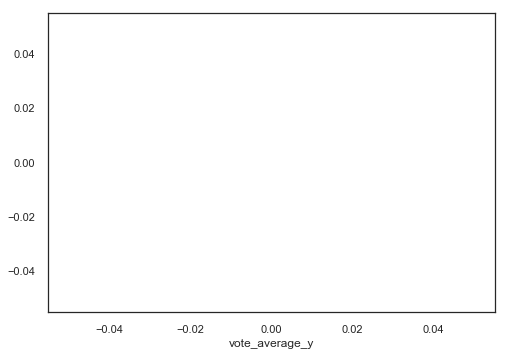

In [158]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

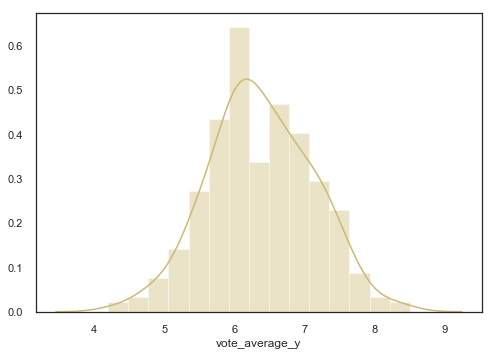

In [159]:

Crime_mask = (X3['Crime'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Crime_mask]['vote_average_y'], color= 'y')

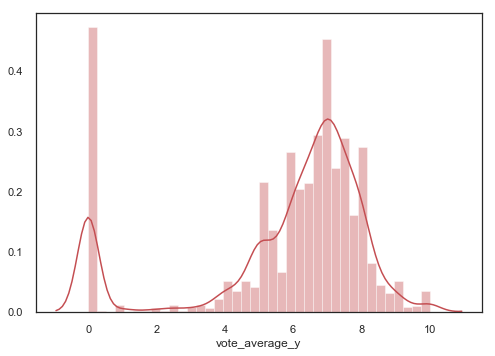

In [160]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

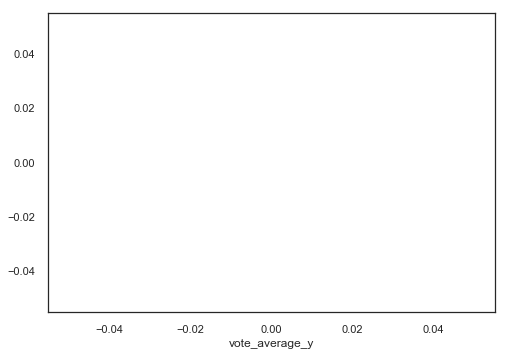

In [161]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

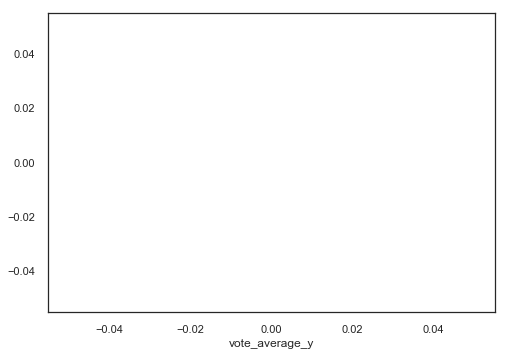

In [162]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

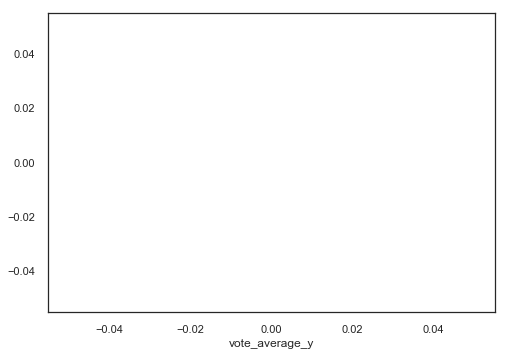

In [163]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

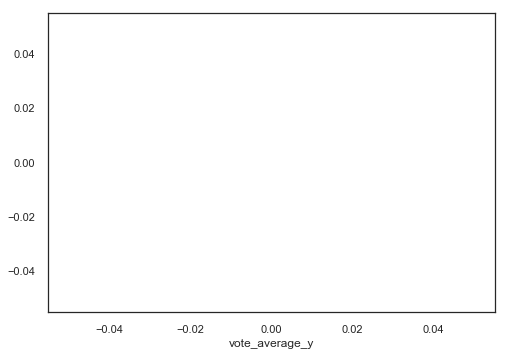

In [164]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

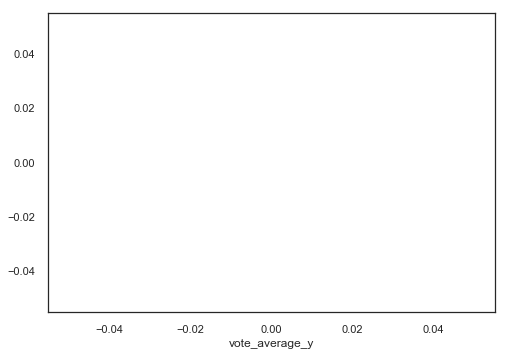

In [165]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

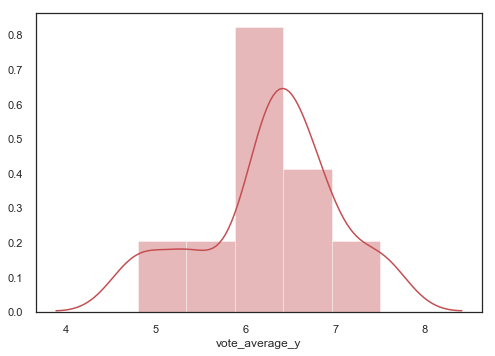

In [166]:

Documentary_mask = (X3['Documentary'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Documentary_mask]['vote_average_y'], color= 'r')

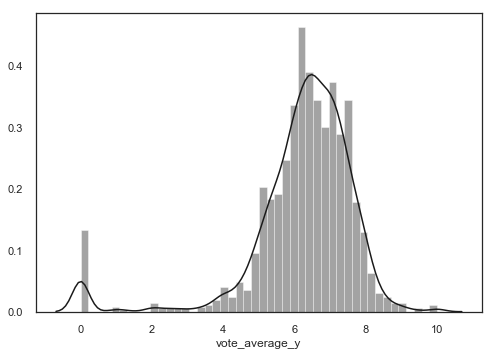

In [167]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

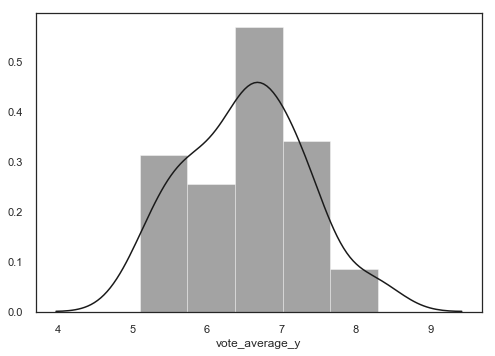

In [168]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

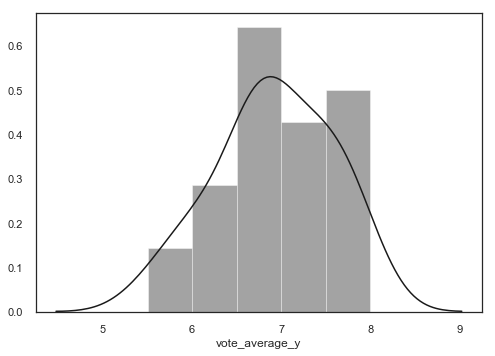

In [169]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

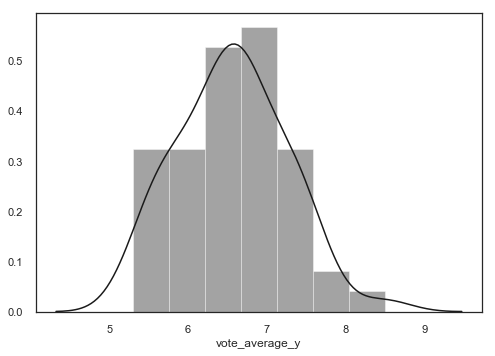

In [170]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

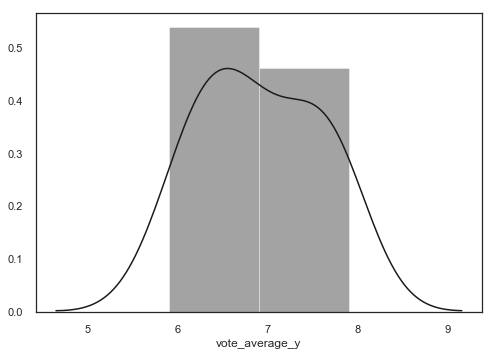

In [171]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

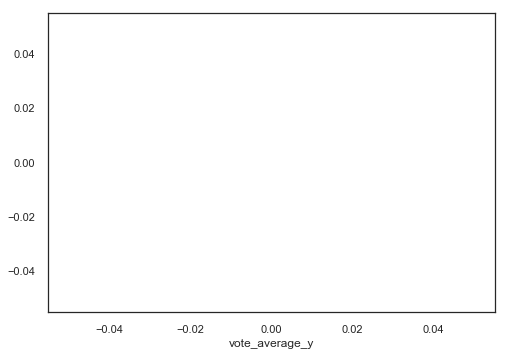

In [172]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

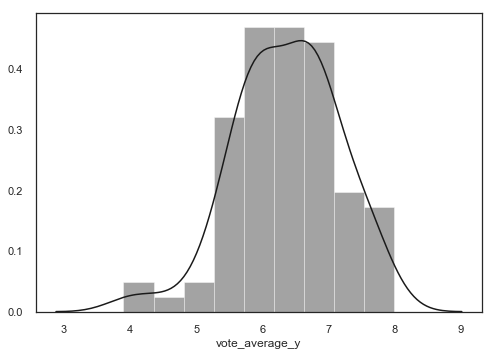

In [173]:

Animation_mask = (X3['Animation'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Animation_mask]['vote_average_y'], color= 'k')

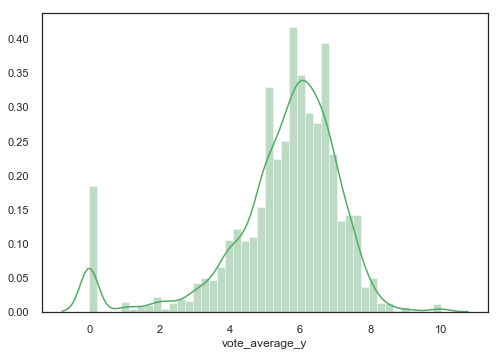

In [174]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

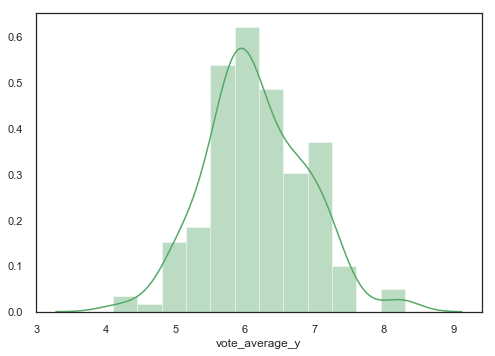

In [175]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

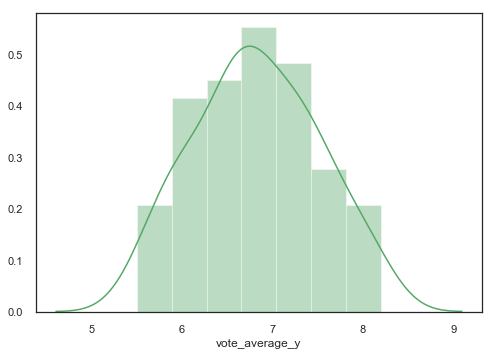

In [176]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

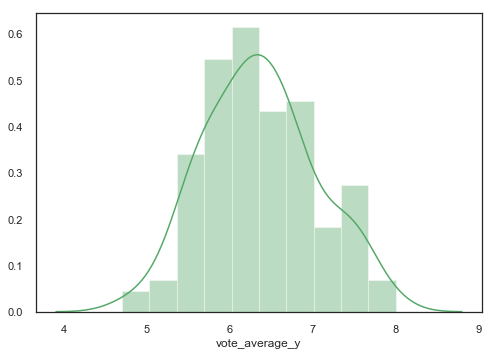

In [177]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

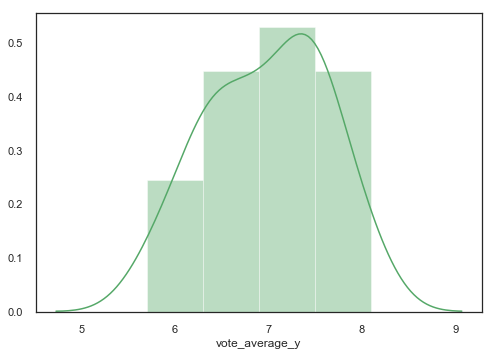

In [178]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

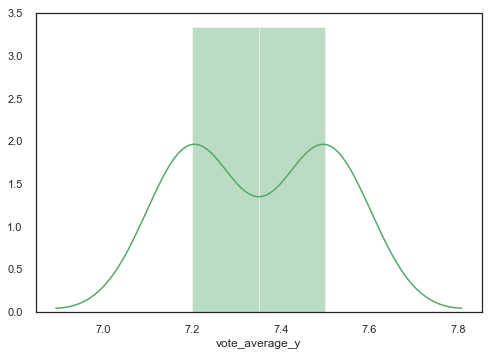

In [179]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

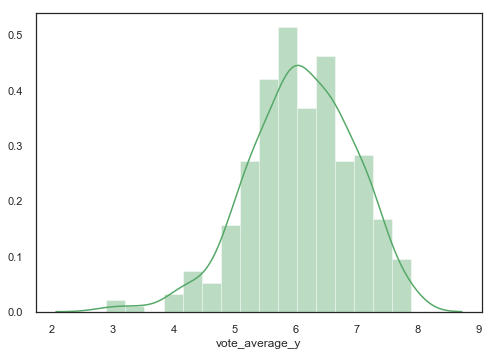

In [180]:

Adventure_mask = (X3['Adventure'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Adventure_mask]['vote_average_y'], color= 'g')

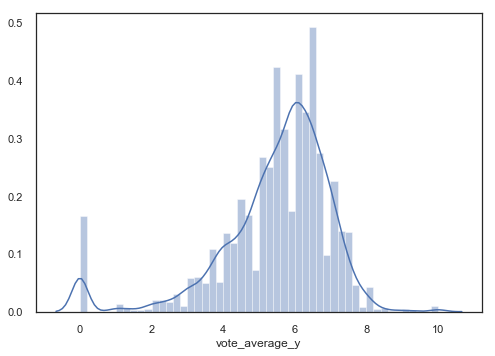

In [181]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

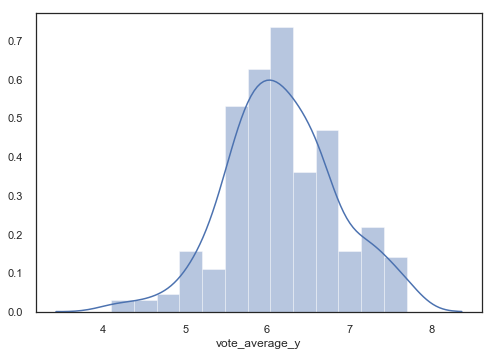

In [182]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

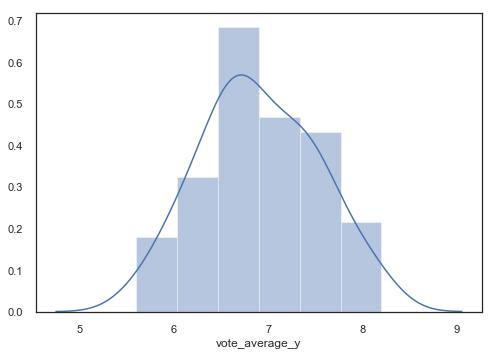

In [183]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

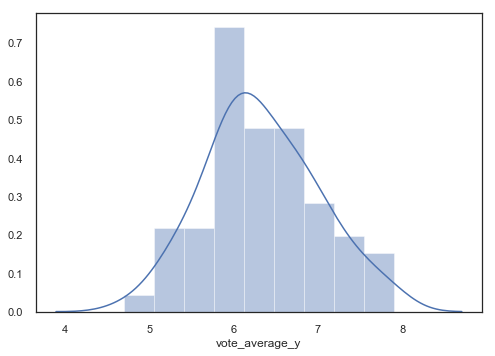

In [184]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

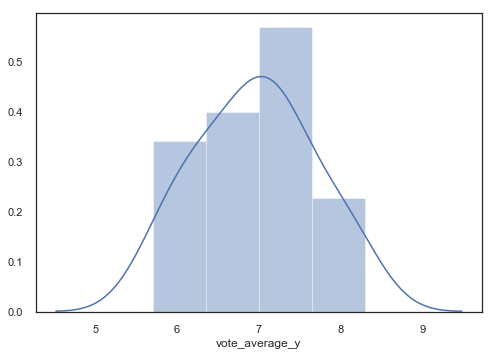

In [185]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

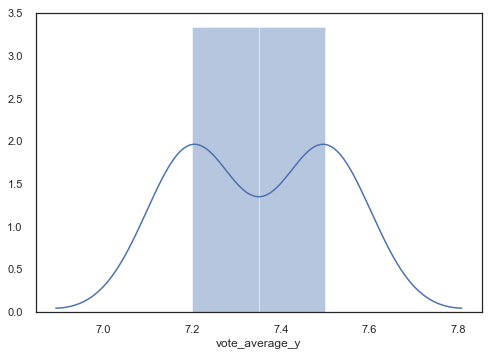

In [186]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

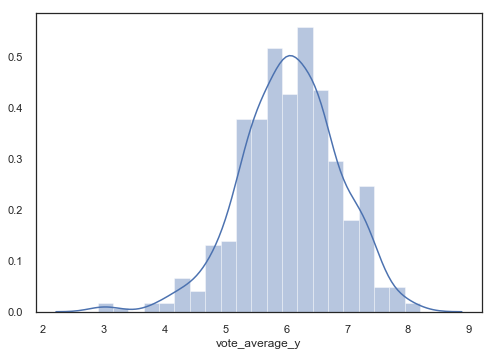

In [187]:

Action_mask = (X3['Action'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Action_mask]['vote_average_y'], color= 'b')

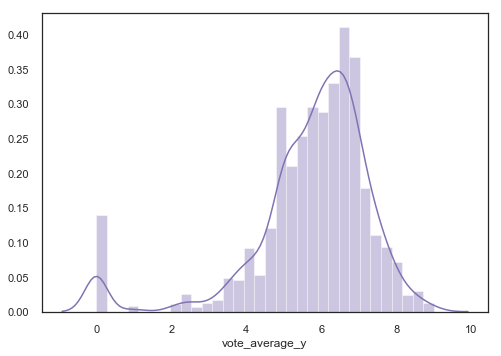

In [188]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

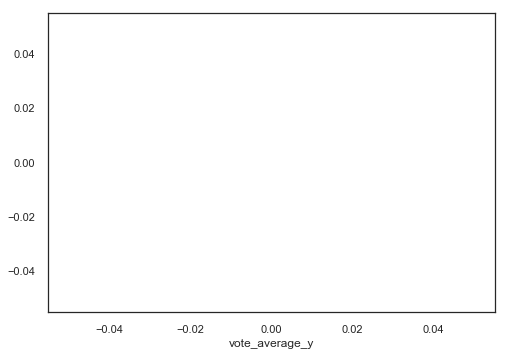

In [189]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

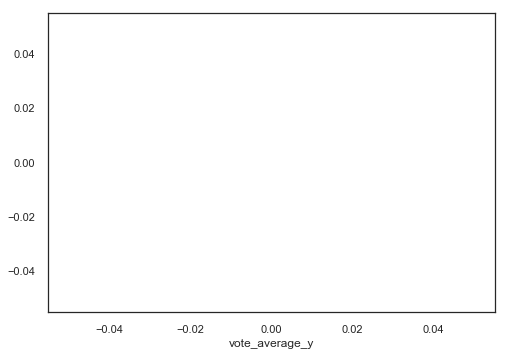

In [190]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

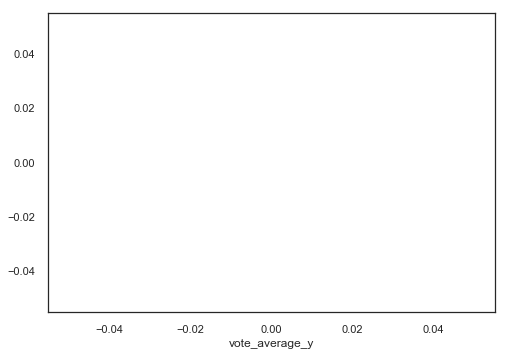

In [191]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

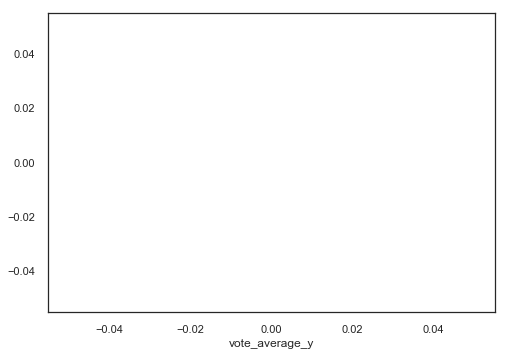

In [192]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

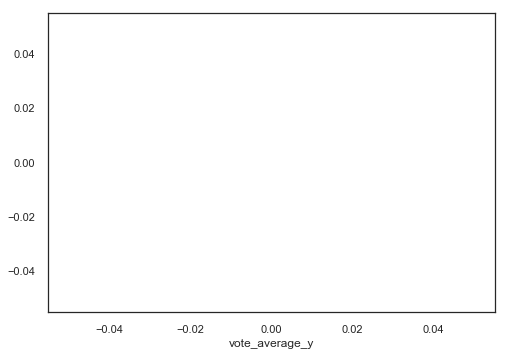

In [193]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

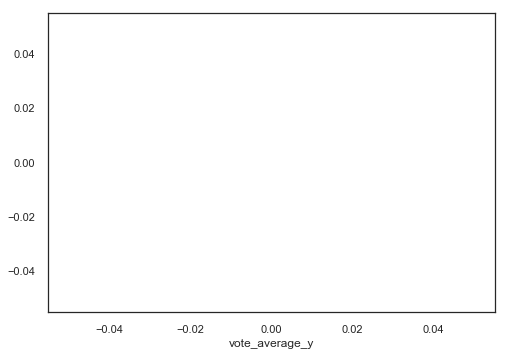

In [194]:

Foreign_mask = (X3['Foreign'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Foreign_mask]['vote_average_y'], color= 'm')

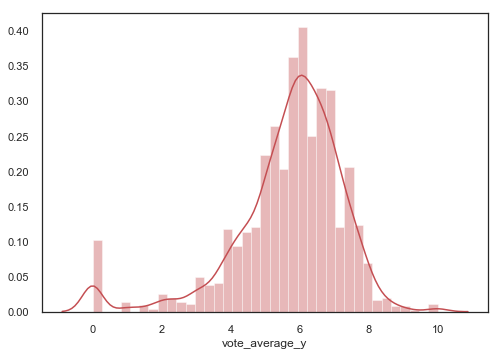

In [195]:

Fantasy_mask = (X3['Fantasy'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Fantasy_mask]['vote_average_y'], color= 'r')

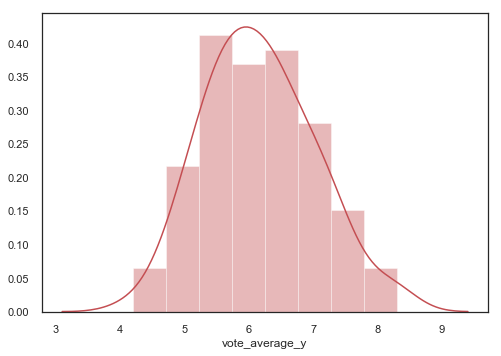

In [196]:

Fantasy_mask = (X3['Fantasy'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Fantasy_mask]['vote_average_y'], color= 'r')

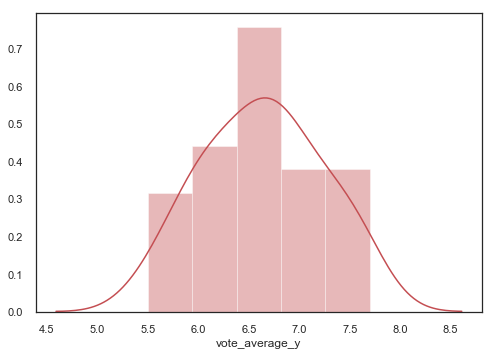

In [197]:

Fantasy_mask = (X3['Fantasy'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Fantasy_mask]['vote_average_y'], color= 'r')

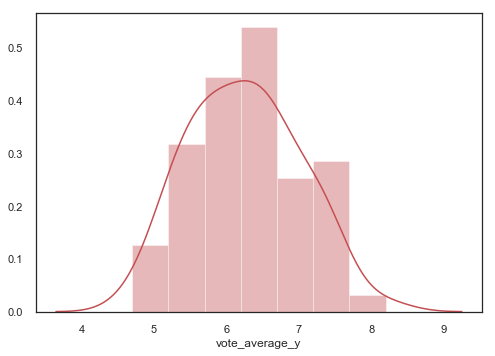

In [198]:

Fantasy_mask = (X3['Fantasy'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Fantasy_mask]['vote_average_y'], color= 'r')

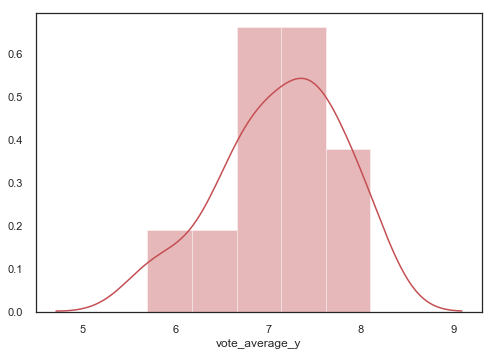

In [199]:

Fantasy_mask = (X3['Fantasy'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Fantasy_mask]['vote_average_y'], color= 'r')

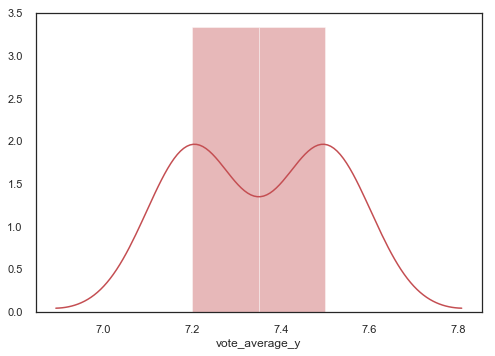

In [200]:

Fantasy_mask = (X3['Fantasy'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Fantasy_mask]['vote_average_y'], color= 'r')

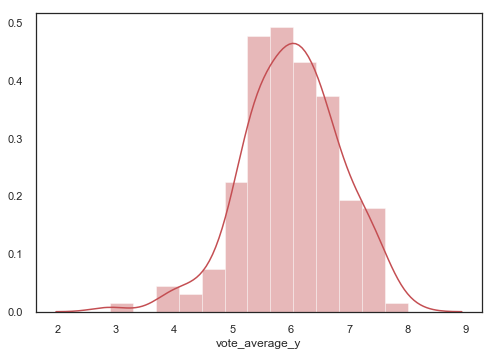

In [201]:

Fantasy_mask = (X3['Fantasy'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Fantasy_mask]['vote_average_y'], color= 'r')

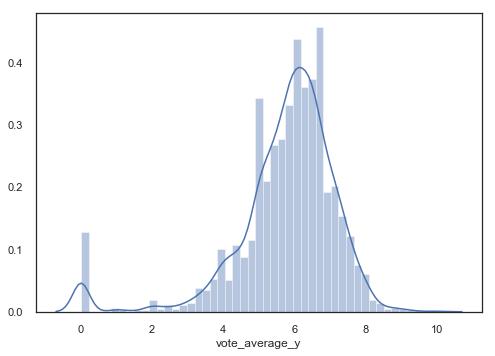

In [202]:

Mystery_mask = (X3['Mystery'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Mystery_mask]['vote_average_y'], color= 'b')

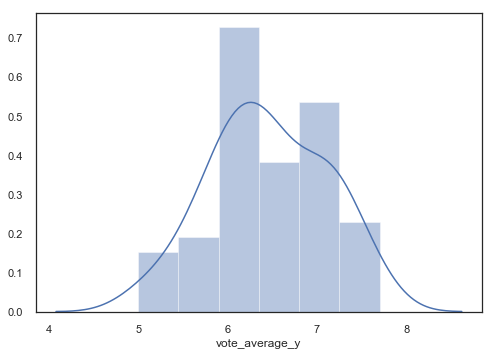

In [203]:

Mystery_mask = (X3['Mystery'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Mystery_mask]['vote_average_y'], color= 'b')

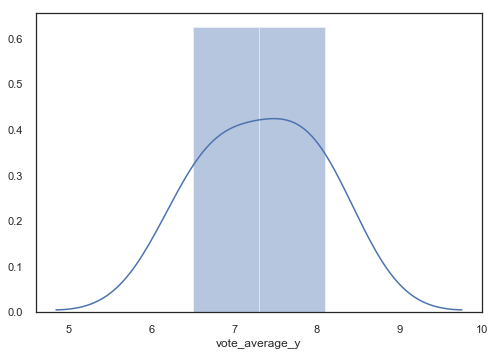

In [204]:

Mystery_mask = (X3['Mystery'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Mystery_mask]['vote_average_y'], color= 'b')

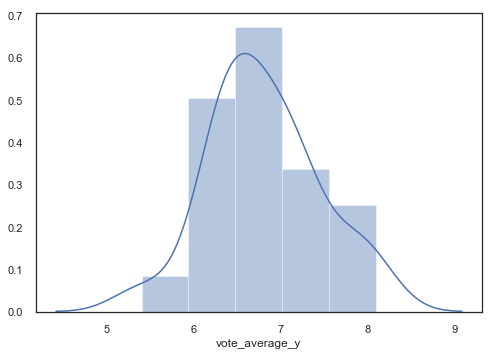

In [205]:

Mystery_mask = (X3['Mystery'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Mystery_mask]['vote_average_y'], color= 'b')

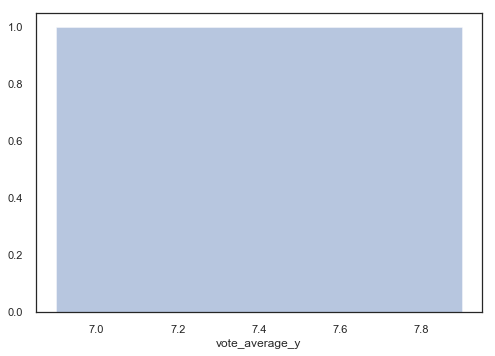

In [206]:

Mystery_mask = (X3['Mystery'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Mystery_mask]['vote_average_y'], color= 'b')

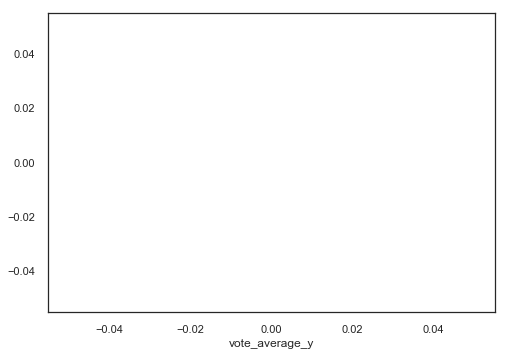

In [207]:

Mystery_mask = (X3['Mystery'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Mystery_mask]['vote_average_y'], color= 'b')

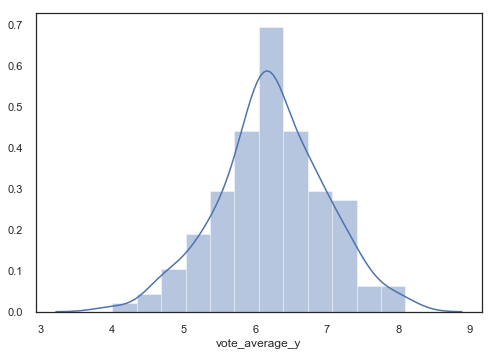

In [208]:

Mystery_mask = (X3['Mystery'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Mystery_mask]['vote_average_y'], color= 'b')

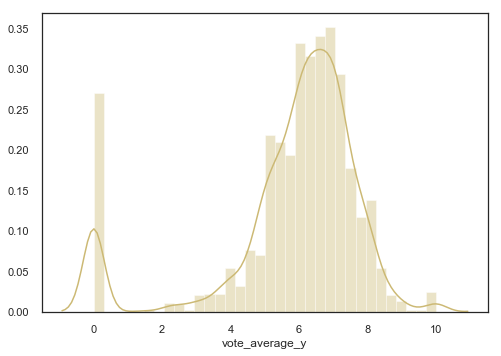

In [209]:

Music_mask = (X3['Music'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Music_mask]['vote_average_y'], color= 'y')

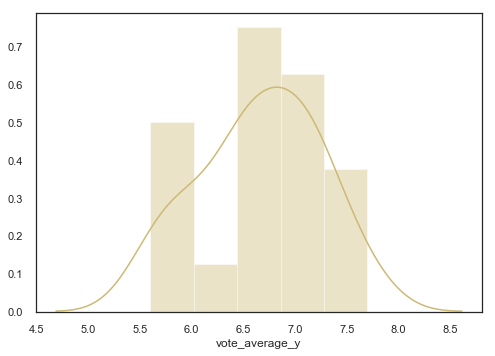

In [210]:

Music_mask = (X3['Music'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Music_mask]['vote_average_y'], color= 'y')

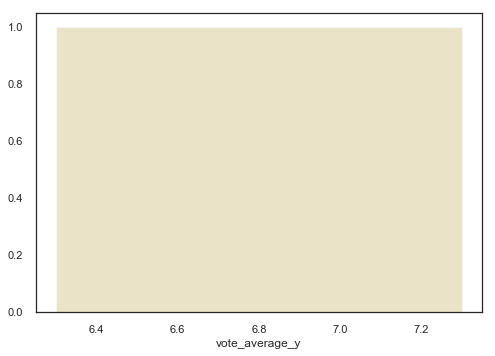

In [211]:

Music_mask = (X3['Music'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Music_mask]['vote_average_y'], color= 'y')

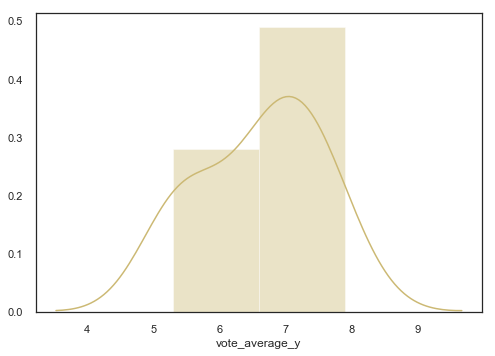

In [212]:

Music_mask = (X3['Music'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Music_mask]['vote_average_y'], color= 'y')

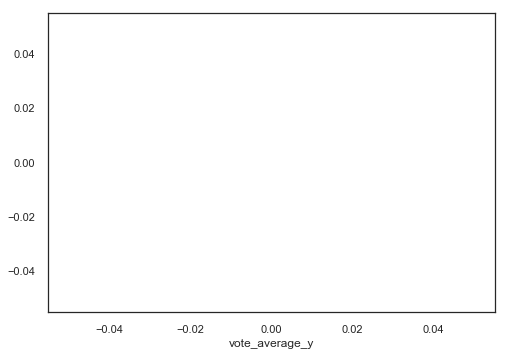

In [213]:

Music_mask = (X3['Music'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Music_mask]['vote_average_y'], color= 'y')

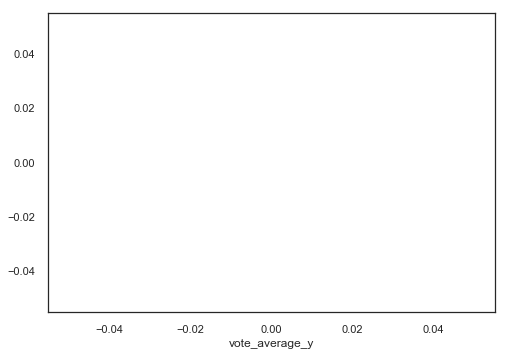

In [214]:

Music_mask = (X3['Music'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Music_mask]['vote_average_y'], color= 'y')

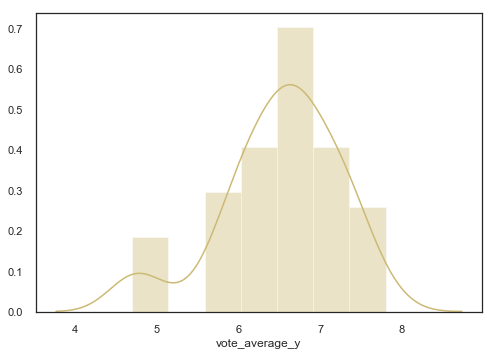

In [215]:

Music_mask = (X3['Music'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Music_mask]['vote_average_y'], color= 'y')

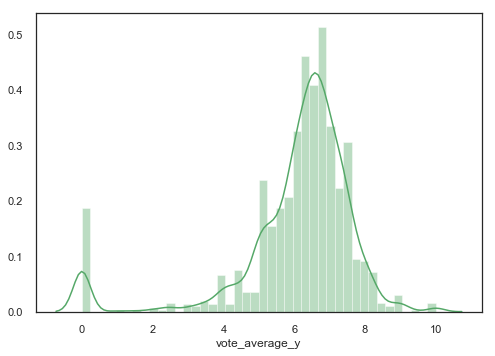

In [216]:

History_mask = (X3['History'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[History_mask]['vote_average_y'], color= 'g')

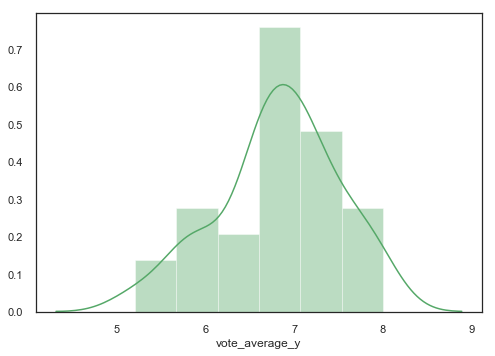

In [217]:

History_mask = (X3['History'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[History_mask]['vote_average_y'], color= 'g')

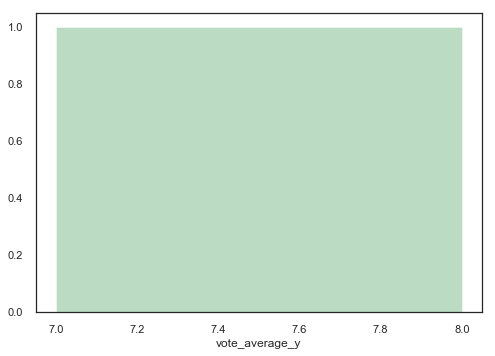

In [218]:

History_mask = (X3['History'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[History_mask]['vote_average_y'], color= 'g')

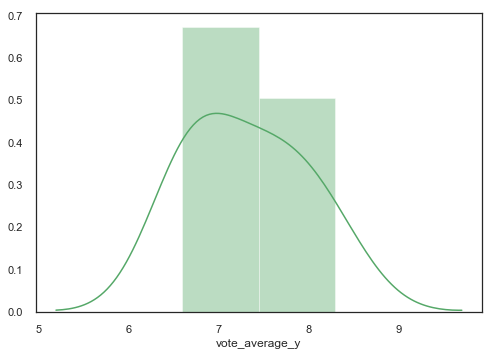

In [219]:

History_mask = (X3['History'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[History_mask]['vote_average_y'], color= 'g')

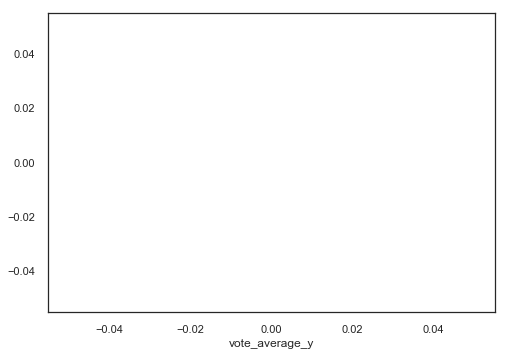

In [220]:

History_mask = (X3['History'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[History_mask]['vote_average_y'], color= 'g')

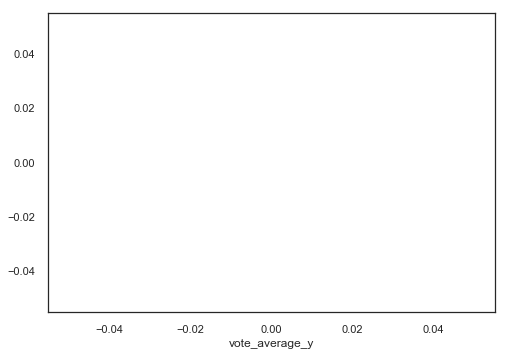

In [221]:

History_mask = (X3['History'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[History_mask]['vote_average_y'], color= 'g')

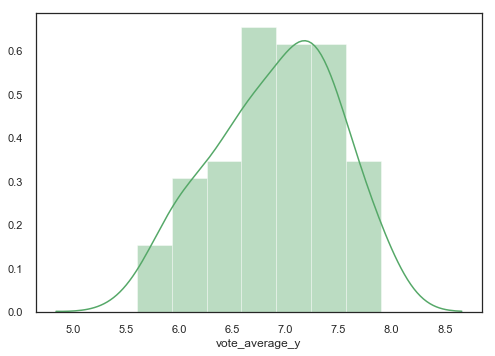

In [222]:

History_mask = (X3['History'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[History_mask]['vote_average_y'], color= 'g')

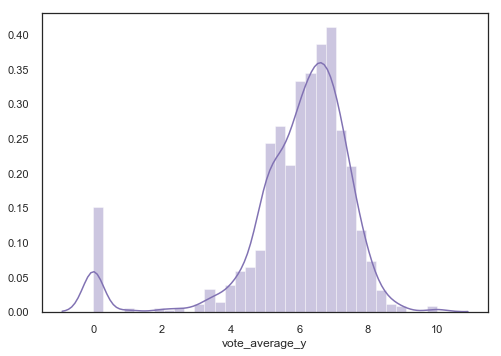

In [223]:

War_mask = (X3['War'] == 1) &(X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[War_mask]['vote_average_y'], color= 'm')

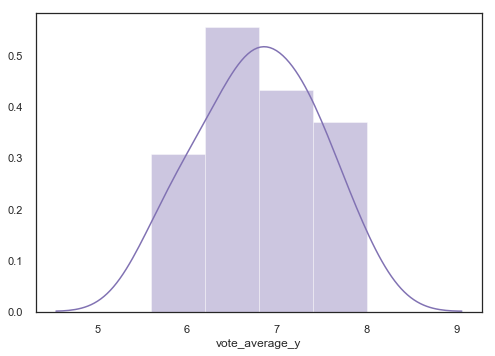

In [224]:

War_mask = (X3['War'] == 1) &(X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[War_mask]['vote_average_y'], color= 'm')

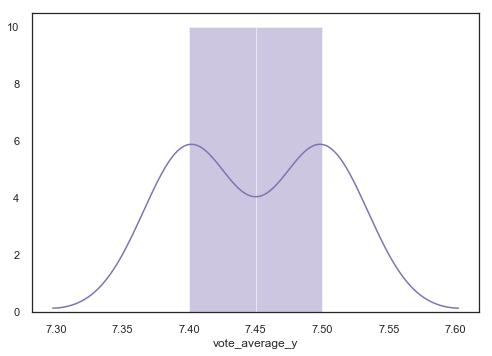

In [225]:

War_mask = (X3['War'] == 1) &(X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[War_mask]['vote_average_y'], color= 'm')

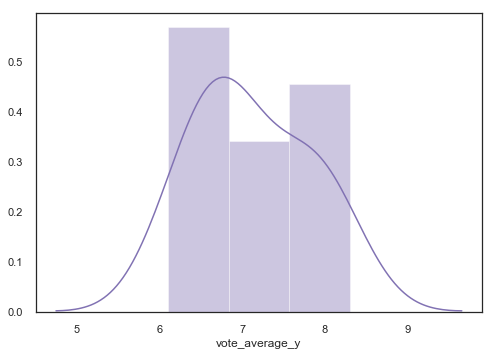

In [226]:

War_mask = (X3['War'] == 1) &(X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[War_mask]['vote_average_y'], color= 'm')

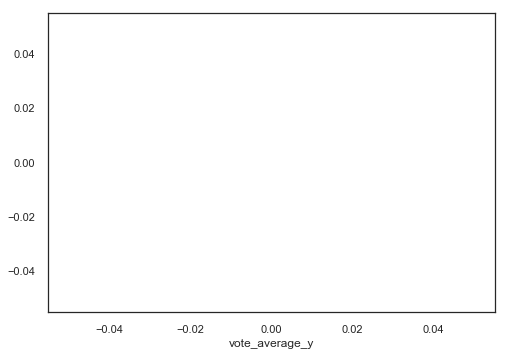

In [227]:

War_mask = (X3['War'] == 1) &(X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[War_mask]['vote_average_y'], color= 'm')

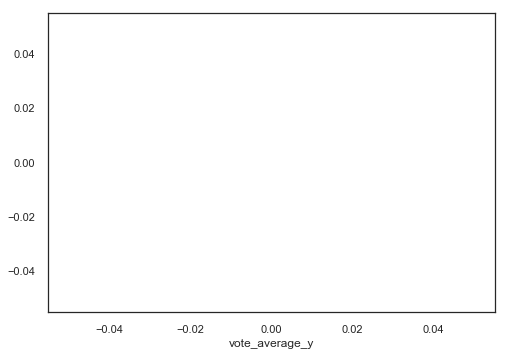

In [228]:

War_mask = (X3['War'] == 1) &(X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[War_mask]['vote_average_y'], color= 'm')

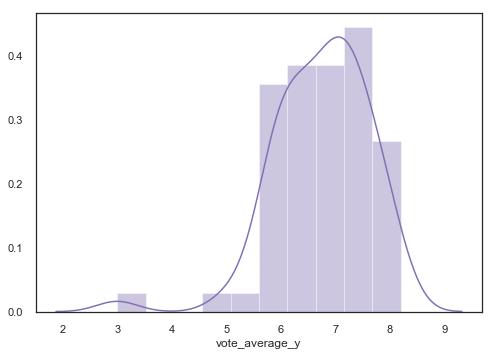

In [229]:

War_mask = (X3['War'] == 1) &(X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[War_mask]['vote_average_y'], color= 'm')

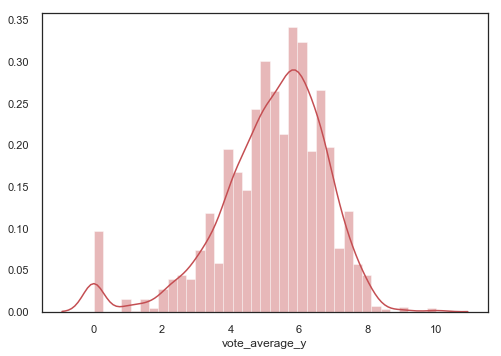

In [230]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 0) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

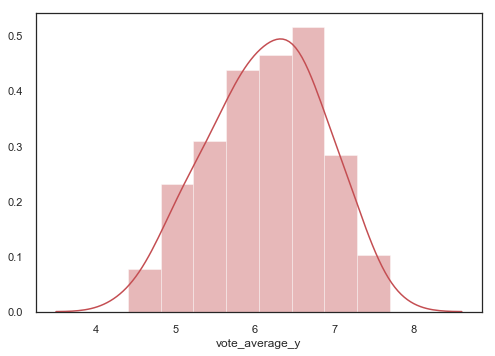

In [231]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 1) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

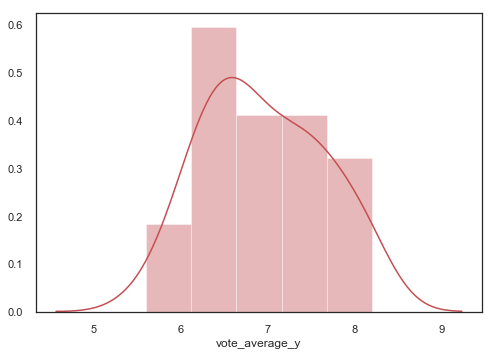

In [232]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 2) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

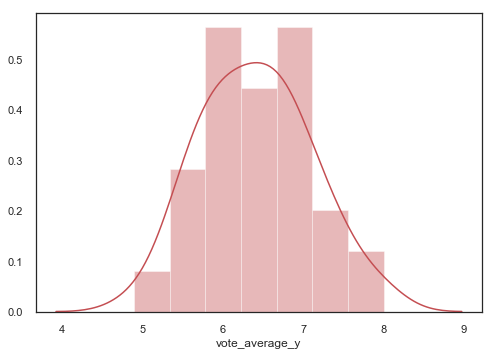

In [233]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 3) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

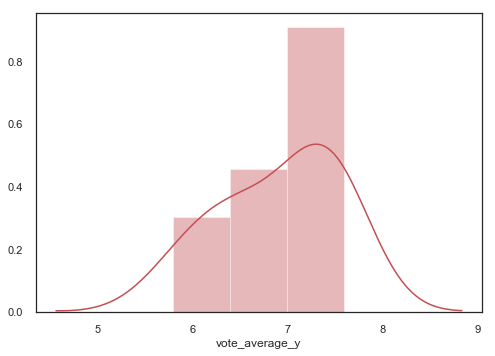

In [234]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 4) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

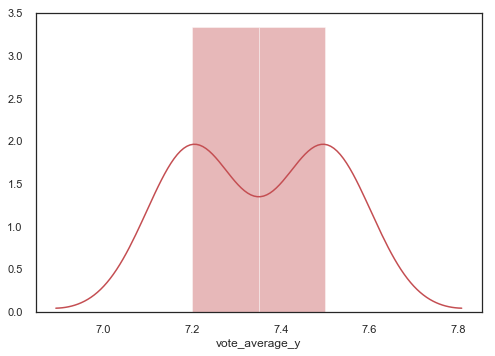

In [235]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 5) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

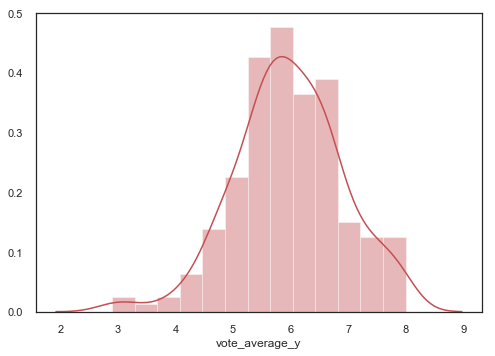

In [236]:

Science_Fiction_mask = (X3['Science Fiction'] == 1) & (X3['Label'] == 6) #&(X3['Western'] == 1) &
ax = sns.distplot(X3[Science_Fiction_mask]['vote_average_y'], color= 'r')

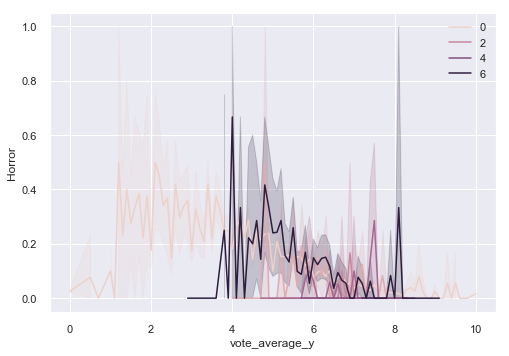

In [237]:
import seaborn as sns
sns.set(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x=X3['vote_average_y'], y= X3['Horror'],
                hue= labels)

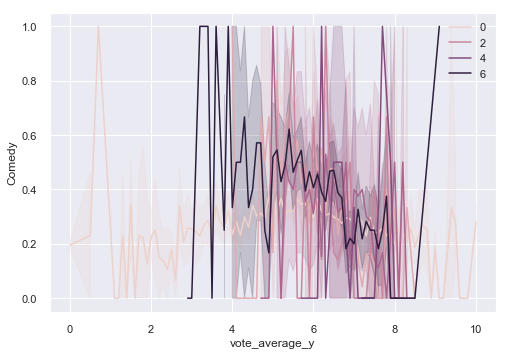

In [238]:
import seaborn as sns
sns.set(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x=X3['vote_average_y'], y= X3['Comedy'],
                hue= labels)

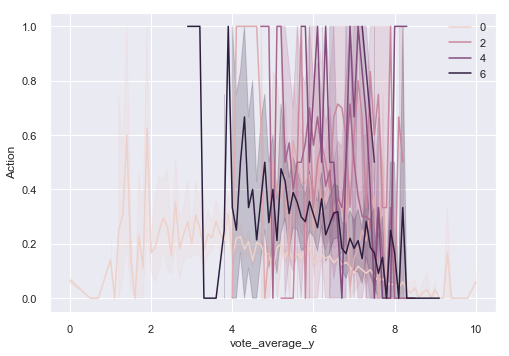

In [239]:
import seaborn as sns
sns.set(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x=X3['vote_average_y'], y= X3['Action'],
                hue= labels)

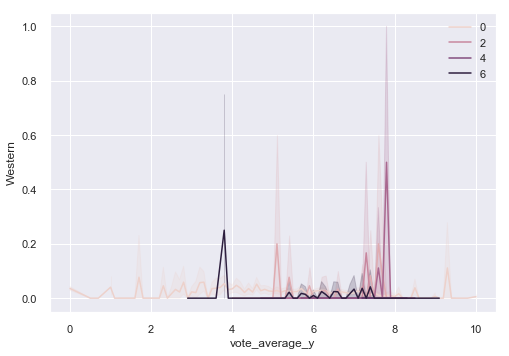

In [240]:
import seaborn as sns
sns.set(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x=X3['vote_average_y'], y= X3['Western'],
                hue= labels)

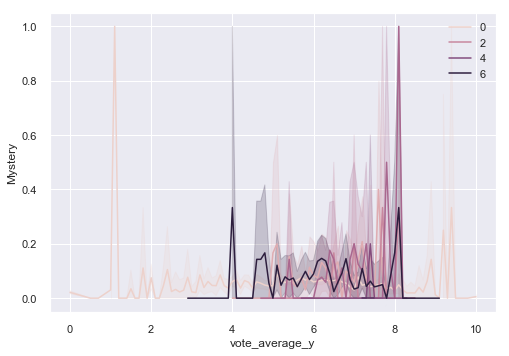

In [241]:
import seaborn as sns
sns.set(style="darkgrid")



# Plot the responses for different events and regions
sns.lineplot(x=X3['vote_average_y'], y= X3['Mystery'],
                hue= labels)

### What about some other clustering techniques? Trying Mean Shift:

In [242]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X2, quantile=0.2, n_samples=40000)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X2)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 260


### I don't know about this. 260 clusters seems like a lot of granularity. Perhaps this can be explored further but for now it seems a bit much.

### Affinity Propagation

In [243]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X2)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


KeyboardInterrupt: 

In [245]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X2, 0], X2[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

SyntaxError: invalid syntax (<ipython-input-245-3da86a4cdc1e>, line 12)

###  Spectral Clustering 

In [246]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=7

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X2)

#Graph results.
plt.scatter(X2[:, 0], X2[:, 1], c= sc.labels_)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

KeyboardInterrupt: 